<h1>Table of contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading-and-inspection" data-toc-modified-id="Data-loading-and-inspection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading and inspection</a></span><ul class="toc-item"><li><span><a href="#Data-file-loading" data-toc-modified-id="Data-file-loading-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data file loading</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preparation-and-processing" data-toc-modified-id="Data-preparation-and-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation and processing</a></span><ul class="toc-item"><li><span><a href="#Duplicates-handling" data-toc-modified-id="Duplicates-handling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Duplicates handling</a></span></li><li><span><a href="#Data-types-convertion-and-total-sales-calculation" data-toc-modified-id="Data-types-convertion-and-total-sales-calculation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data types convertion and total sales calculation</a></span></li><li><span><a href="#Missing-values-and-data-errors-handling" data-toc-modified-id="Missing-values-and-data-errors-handling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Missing values and data errors handling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Sales-analysis-by-platform,-selecting-relevant-time-period-for-further-analysis" data-toc-modified-id="Sales-analysis-by-platform,-selecting-relevant-time-period-for-further-analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sales analysis by platform, selecting relevant time period for further analysis</a></span></li><li><span><a href="#Sales-analysis-by-genre" data-toc-modified-id="Sales-analysis-by-genre-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sales analysis by genre</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Analysing-typical-users-by-regions" data-toc-modified-id="Analysing-typical-users-by-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysing typical users by regions</a></span><ul class="toc-item"><li><span><a href="#Popular-platforms" data-toc-modified-id="Popular-platforms-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Popular platforms</a></span></li><li><span><a href="#Popular-genres" data-toc-modified-id="Popular-genres-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Popular genres</a></span></li><li><span><a href="#ESRB-rating" data-toc-modified-id="ESRB-rating-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ESRB rating</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#User-scores-analysis" data-toc-modified-id="User-scores-analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>User scores analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-conclusion" data-toc-modified-id="Final-conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final conclusion</a></span></li></ul></div>

# Analysis of video games success patterns

Dataset consist of historical data about games sales, critic and user scores, genres and platforms.

**Goal:**  To find relationships and patterns in successfully sellable games. It will allow to count on potentially popular product and plan advertising campaign.

# Data description

 - Name — game name
 - Platform — platform
 - Year_of_Release — game year of release
 - Genre — genre
 - NA_sales — sales in North America region in millions of copies
 - EU_sales — sales in Europe region in millions of copies
 - JP_sales — sales in Japan region in millions of copies
 - Other_sales — sales in other world in millions of copies
 - Critic_Score — critic score (0-100)
 - User_Score — user score (0-10)
 - Rating — ESRB (Entertainment Software Rating Board) rating of a game

## Data loading and inspection

### Data file loading

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 50)

try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('C:/Jupyter_projects/YP/datasets/4_games.csv')

display(games.shape)
games.head(10)

(16715, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [4]:
# column names to lower case
games.columns = games.columns.str.lower()
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E


### Conclusion

1. It needs to handle missing values in the following columns:
    - name;
    - year_of_release;
    - genre;
    - critic_score;
    - user_score;
    - rating;
2. It needs to convert data types in the following columns:
    - year_of_release, critic_score (into int);
    - user_score (into float);
    - rating into categorical (convertion is done in section 4.3, when first time it will be used and have less amount of data and hence categories);
3. It needs to hande "tbd" values in user_score;

## Data preparation and processing

### Duplicates handling

In [5]:
games.duplicated().sum()

0

In [6]:
# check if there are duplicates on different string case in name
games_copy = games.copy(deep=True)
games_copy['name'] = games_copy['name'].str.lower()
games_copy.duplicated().sum()

0

- No full duplicates are found;

### Data types convertion and total sales calculation

- Values of year_of_release need to be converted to int. But so far no missing values handling procedures are done so we cannot convert values to int, because of np.nan is a float. That is why year_of_release values are converted in section 2.3 right after handling of missing values;
- It needs to convert values of critic_score into float;
- It needs to convert values of user_score into float. Beforehand lets replace "tbd" values by dummy value of -1 in order to be able to make calculations using values of this column;

In [7]:
games['critic_score'] = games['critic_score'].astype('float', 
                                                     errors='ignore'
                                                     )

games['user_score'] = games['user_score'].replace('tbd', -1)
games['user_score'] = games['user_score'].astype('float', 
                                                 errors='ignore'
                                                 )

display(games.dtypes)
print('')
games.info()

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
games['total_sales'] = sum([games['na_sales'], 
                            games['eu_sales'], 
                            games['jp_sales'], 
                            games['other_sales']
                           ]
                          )
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38


### Missing values and data errors handling

In [9]:
games.isna().mean()*100

name               0.01
platform           0.00
year_of_release    1.61
genre              0.01
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.32
user_score        40.09
rating            40.48
total_sales        0.00
dtype: float64

In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,nan,NaN,2.39
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,nan,NaN,0.03


In [11]:
games[games['year_of_release'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.50,E,5.24
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.40,E,3.50
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.90,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,nan,NaN,3.00
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,nan,NaN,2.53
627,Rock Band,X360,nan,Misc,1.93,0.33,0.00,0.21,92.00,8.20,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.15,0.18,0.00,0.07,73.00,-1.00,E,2.40
678,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,1.51,0.61,0.00,0.21,78.00,6.60,E10+,2.33
719,Call of Duty 3,Wii,nan,Shooter,1.17,0.84,0.00,0.23,69.00,6.70,T,2.24
805,Rock Band,Wii,nan,Misc,1.33,0.56,0.00,0.20,80.00,6.30,T,2.09


- For the part of the rows, which have missing values in year_of_release, the year is mentioned in the name of the game;
- That is typical for sport and racing games;
- Moreover, it worths to note that beside 4-digits designation of the year (FIFA Soccer 2004), there are also games having 2-digits designation of the year (Triple Play 99);
- Lets create the function to extract the release year from the game name for both the options;

In [12]:
def parsing_year_from_name_four_digits(value):
    """
    extracts 4-digits year designation
    """
    try:
        return int(value[-4:]) if int(value[-4:]) < 2017 and int(value[-4:]) > 1979 else 0
    except:
        return 0

In [13]:
def parsing_year_from_name_two_digits(row):
    """
    extracts 2-digits year designation and returns it in the form of 4-digits year designation
    """
    try:
        if row['year_from_name'] == 0 and int(row['name'][-3:]) < 100 and int(row['name'][-3:]) > 79:
            return int('19'+row['name'][-2:])
        elif row['year_from_name'] == 0 and int(row['name'][-3:]) < 17:
            return int('20'+row['name'][-2:])
        else:
            return row['year_from_name']
    except:
        return 0

In [14]:
games['year_from_name'] = games['name'].apply(parsing_year_from_name_four_digits)
games['year_from_name'].value_counts()

0       16059
2002       69
2000       56
2004       55
2010       46
2001       45
2003       44
2005       42
2011       40
2009       38
2015       31
2008       31
2006       29
2012       29
2014       29
2016       26
2013       22
2007       20
1999        2
1996        2
Name: year_from_name, dtype: int64

In [15]:
games['year_from_name_2_digits'] = games.apply(parsing_year_from_name_two_digits, axis=1)
games.loc[games['year_of_release'].isna(), 
         ['name', 'year_of_release', 'year_from_name', 'year_from_name_2_digits']
         ].head(15)

,name,year_of_release,year_from_name,year_from_name_2_digits
183,Madden NFL 2004,nan,2004,2004
377,FIFA Soccer 2004,nan,2004,2004
456,LEGO Batman: The Videogame,nan,0,0
475,wwe Smackdown vs. Raw 2006,nan,2006,2006
609,Space Invaders,nan,0,0
627,Rock Band,nan,0,0
657,Frogger's Adventures: Temple of the Frog,nan,0,0
678,LEGO Indiana Jones: The Original Adventures,nan,0,0
719,Call of Duty 3,nan,0,0
805,Rock Band,nan,0,0


- Now lets combine two created columns with extracted release years;

In [16]:
def year_columns_merge(row):
    """
    combines two created columns with extracted release years
    """
    if row['year_from_name_2_digits'] > row['year_from_name']:
        return row['year_from_name_2_digits']
    else:
        return row['year_from_name']

In [17]:
games['year_from_name'] = games.apply(year_columns_merge, axis=1)
games.drop(columns=['year_from_name_2_digits'], inplace=True)
games[games['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_from_name
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.50,E,5.24,2004
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.40,E,3.50,2004
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.90,E10+,3.06,0
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,nan,NaN,3.00,2006
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,nan,NaN,2.53,0
627,Rock Band,X360,nan,Misc,1.93,0.33,0.00,0.21,92.00,8.20,T,2.47,0
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.15,0.18,0.00,0.07,73.00,-1.00,E,2.40,0
678,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,1.51,0.61,0.00,0.21,78.00,6.60,E10+,2.33,0
719,Call of Duty 3,Wii,nan,Shooter,1.17,0.84,0.00,0.23,69.00,6.70,T,2.24,0
805,Rock Band,Wii,nan,Misc,1.33,0.56,0.00,0.20,80.00,6.30,T,2.09,0


- It is typical for sport and racing games that if the name includes the year then the release year is the one in the name minus one. For example, FIFA Soccer 2004 have released in 2003. Lets check genres of the games where it was possibple to extract release year from the game name;

In [18]:
games[(games['year_of_release'].isna()) & 
      (games['year_from_name'] > 0)
     ]['genre'].value_counts()

Sports      17
Racing       3
Fighting     1
Name: genre, dtype: int64

In [19]:
games[(games['year_of_release'].isna()) & 
      (games['year_from_name'] > 0) & 
      (games['genre'] == 'Fighting')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_from_name
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,nan,NaN,3.00,2006


- All the games where it was possible to extract year from the name are sport or racing games, so lets substract one from extracted year;

In [20]:
games.loc[(games['year_of_release'].isna()) &
          (games['year_from_name'] > 0), 
          'year_from_name'
         ] = games['year_from_name'] - 1

games.loc[games['year_of_release'].isna(), 
         ['name', 'year_of_release', 'year_from_name']
         ].head(15)

,name,year_of_release,year_from_name
183,Madden NFL 2004,nan,2003
377,FIFA Soccer 2004,nan,2003
456,LEGO Batman: The Videogame,nan,0
475,wwe Smackdown vs. Raw 2006,nan,2005
609,Space Invaders,nan,0
627,Rock Band,nan,0
657,Frogger's Adventures: Temple of the Frog,nan,0
678,LEGO Indiana Jones: The Original Adventures,nan,0
719,Call of Duty 3,nan,0
805,Rock Band,nan,0


- Replacing missing values using extracted ones;

In [21]:
print('NaNs in year_of_release BEFORE:', len(games[games['year_of_release'].isna()]))

# indexes to check results
indexes = games[(games['year_of_release'].isna()) & 
          (games['year_from_name'] > 0)].index

# replacing nans
games.loc[(games['year_of_release'].isna()) & 
          (games['year_from_name'] > 0), 
         'year_of_release'] = games['year_from_name']

print('NaNs in year_of_release AFTER:', len(games[games['year_of_release'].isna()]))

# checking results
games.iloc[indexes, 
           [0, 2, 11]
          ]

NaNs in year_of_release BEFORE: 269
NaNs in year_of_release AFTER: 248


,name,year_of_release,total_sales
183,Madden NFL 2004,2003.00,5.24
377,FIFA Soccer 2004,2003.00,3.50
475,wwe Smackdown vs. Raw 2006,2005.00,3.00
1301,Triple Play 99,1998.00,1.46
1650,NASCAR Thunder 2003,2002.00,1.22
2479,Madden NFL 07,2006.00,0.84
2492,MLB SlugFest 20-03,2002.00,0.84
2849,Madden NFL 11,2010.00,0.72
3413,Madden NFL 06,2005.00,0.58
3486,Madden NFL 2002,2001.00,0.58


In [22]:
games.drop(columns=['year_from_name'], inplace=True)

In [23]:
print('Fraction of NaNs in year_of_release: {:.2%}'.format(len(games[games['year_of_release'].isna()])/len(games)))

Fraction of NaNs in year_of_release: 1.48%


- As it was shown before missing values in name and genre are the same and it is only two rows so we can remove it;
- Remaining missing values in year_of_release are 1.48% of all the data so we can remove it;

In [24]:
print(games.isna().mean()*100)

games.dropna(subset=['name'], inplace=True)
games.dropna(subset=['year_of_release'], inplace=True)

print('')
print(games.isna().mean()*100)

name               0.01
platform           0.00
year_of_release    1.48
genre              0.01
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.32
user_score        40.09
rating            40.48
total_sales        0.00
dtype: float64

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.42
user_score        40.15
rating            40.58
total_sales        0.00
dtype: float64


- Now lets convert data type in year_of_release into int;

In [25]:
games['year_of_release'] = games['year_of_release'].astype('int')

- Lets handle missing values in rating;

In [26]:
games.rating.value_counts()

E       3935
T       2905
M       1536
E10+    1394
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

- Rating values are closely related to the genre, so lets raplace missing values in rating by the mode of rating values for different genres;
- But first change K-A on E;

In [27]:
games.rating.replace('K-A', 'E', inplace=True)
games.rating.value_counts()

E       3938
T       2905
M       1536
E10+    1394
EC         8
RP         1
AO         1
Name: rating, dtype: int64

In [28]:
# extract genre values from rows where rating values are missing
rating_nan_groups = games[games['rating'].isna()]['genre'].value_counts().index

# iterating over rating_nan_groups:
for i in rating_nan_groups:
    # calculating the mode of rating for different genre
    group_mode = games[games['genre'] == i]['rating'].mode()
    # select missing values in rating rows with particular values of genre and replace missing values by the mode value
    games.loc[(games['rating'].isna()) & (games['genre'] == i), 'rating'] = group_mode.values

In [29]:
games.rating.value_counts()

E       7701
T       5524
M       1836
E10+    1394
EC         8
RP         1
AO         1
Name: rating, dtype: int64

In [30]:
games.isna().mean()*100

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.42
user_score        40.15
rating             0.00
total_sales        0.00
dtype: float64

- Now lets figure out what are "tbd" (-1) values user_score. TBD - To Be Determined - is set if number of reviews or scores is not enough to form unbiased score;
- In order to replace these values lets explore possible relationships of user_score values. It should be related to critic_score. So lets first create a copy of the dataset without missing values in user_score and critic_score and then calculate linear and non-linear regression equations and plot all the data;

In [31]:
no_tbd_no_nans_in_scores = games[(~games['critic_score'].isna()) & 
                                 (~games['user_score'].isna()) & 
                                 (games['user_score'] != -1)
                                ]

In [32]:
no_tbd_no_nans_in_scores['user_score'].describe()

count   6908.00
mean       7.19
std        1.44
min        0.50
25%        6.50
50%        7.50
75%        8.20
max        9.60
Name: user_score, dtype: float64

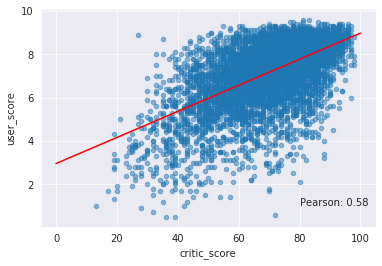

In [33]:
slope, intercept = np.polyfit(no_tbd_no_nans_in_scores['critic_score'], 
                              no_tbd_no_nans_in_scores['user_score'], 
                              1
                             )
pearson = no_tbd_no_nans_in_scores['critic_score'].corr(no_tbd_no_nans_in_scores['user_score'])

no_tbd_no_nans_in_scores.plot(kind='scatter', 
                   x='critic_score', 
                   y='user_score', 
                   alpha=0.5, 
                   grid=True
                    )
plt.plot(np.linspace(0, 100), 
         np.linspace(0, 100)*slope + intercept, 
         #linestyle=':', 
         color='red'
        )
plt.text(80, 1, f'Pearson: {round(pearson, 2)}')
plt.show()

- For linear regression pearson coefficient is not high;
- Visually it seems like there is some non-linear relationship in the data;

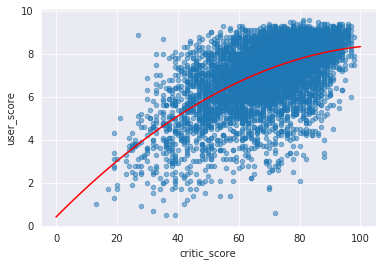

In [34]:
coeffs_user = np.polyfit(no_tbd_no_nans_in_scores['critic_score'], 
                         no_tbd_no_nans_in_scores['user_score'], 
                         2
                        )

no_tbd_no_nans_in_scores.plot(kind='scatter', 
                              x='critic_score', 
                              y='user_score', 
                              alpha=0.5, 
                              grid=True
                             )
plt.plot(np.linspace(0, 100), 
         (np.linspace(0, 100)**2)*coeffs_user[0] + np.linspace(0, 100)*coeffs_user[1] + coeffs_user[2], 
         #linestyle=':', 
          color='red'
         )

plt.show()

- Visually second degree polynomial fits the data much better;
- Lets check the amount of values it is possible to replace using regression equation, because of some rows with tbd values have missing values in critic_score;
- Besides that there are rows containing missing values in both user and critic score columns;

In [35]:
# number of tbd values to replace
len(games[(~games['critic_score'].isna()) & 
          (games['user_score'] == -1)]
   )

1058

In [36]:
# number of remaining tbd values
len(games[(games['critic_score'].isna()) & 
          (games['user_score'] == -1)]
   )

1320

In [37]:
# number of values in rows having missing values in both score columns
len(games[(games['critic_score'].isna()) & 
          (games['user_score'].isna())]
   )

6577

- Almost a half of rows with tbd values is possible to handle;
- Critic_score values will be used to replace tbd in user_score, so lets check distributions of critic_score values for rows with and without tbd values in user_score;

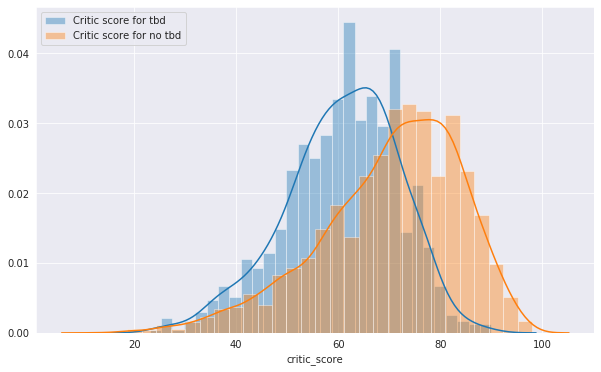

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(games[(~games['critic_score'].isna()) & 
                   (games['user_score'] == -1)]['critic_score'], 
             label='Critic score for tbd',
             bins=30
            )
sns.distplot(games[(~games['critic_score'].isna()) & 
                   (games['user_score'] != -1)]['critic_score'], 
             label='Critic score for no tbd',
             bins=30
            )
plt.legend(loc=2)
plt.show()

- Critics score games with tbd user score lower than those without tbd;
- Hence it can be predicted that after replacing tbd values the distribution of user_score values will be shifted towards low values as well;
- First lets check this assumption and just look at how the user_score distribution after replacing is changed on the test copy of the dataset;

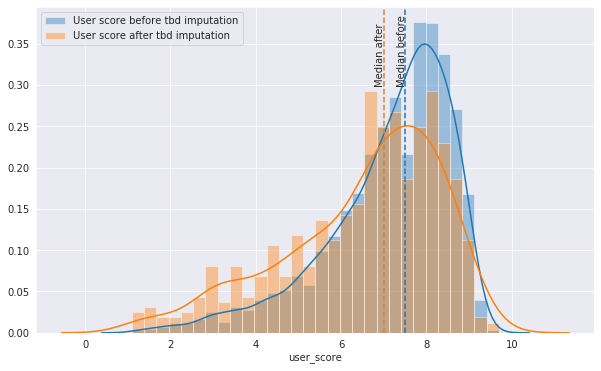

In [39]:
# creating a copy for testing
to_compare = games.copy(deep=True)

# applying regression equation on the test copy
x = to_compare.loc[(to_compare['user_score'] == -1) & 
                   (~to_compare['critic_score'].isna()), 
                   'critic_score']
to_compare.loc[(to_compare['user_score'] > 1) & 
               (~to_compare['critic_score'].isna()), 
               'user_score'] = (x**2)*coeffs_user[0]+x*coeffs_user[1]+coeffs_user[0]
#to_compare.loc[(to_compare['user_score'] > 1) & (~to_compare['critic_score'].isna()), 'user_score'] = x*slope+intercept

# plot histograms and median values
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(games[games['user_score'] > 1]['user_score'].dropna(), 
             bins=30,
             label='User score before tbd imputation'
            )
sns.distplot(to_compare[to_compare['user_score'] > 1]['user_score'].dropna(), 
             bins=30,
             label='User score after tbd imputation'
            )
plt.legend(loc=2)
plt.axvline(games[games['user_score'] > 1]['user_score'].dropna().median(), 
            c='tab:blue', 
            linewidth=1.5, 
            linestyle='--'
           )
plt.axvline(to_compare[to_compare['user_score'] > 1]['user_score'].dropna().median(), 
            c='peru', 
            linewidth=1.5, 
            linestyle='--'
           )
ax.text(games[games['user_score'] > 1]['user_score'].dropna().median()-.2, 
        0.30, 
        'Median before', 
        rotation=90
        )
ax.text(to_compare[to_compare['user_score'] > 1]['user_score'].dropna().median()-.2, 
        0.30, 
        'Median after', 
        rotation=90
        )
plt.show()

- As expected, distribution after imputation enriched a number of low values due to applying regression equation, which is also shown in slight median difference;
- Replacing is correct, lets apply it on the main dataset;

In [40]:
# number of rows with tbd before the replacing
display(len(games[(~games['critic_score'].isna()) 
                  & (games['user_score'] == -1)]
           )
       )

x = games.loc[(games['user_score'] == -1) & 
              (~games['critic_score'].isna()), 
              'critic_score']
games.loc[(games['user_score'] == -1) & 
          (~games['critic_score'].isna()), 
          'user_score'] = (x**2)*coeffs_user[0]+x*coeffs_user[1]+coeffs_user[0]

# number of rows with tbd after the replacing
display(len(games[(~games['critic_score'].isna()) & 
                  (games['user_score'] == -1)]
           )
       )

# remaining tbds
len(games[games['user_score'] == -1])

1058

0

1320

- There ar still 6577 rows with missing values in both score columns, and also 1320 rows, where are missing values in critic_score and tbd values in user_score;
- All the possible option of median/mean imputation based on groups of different features (based on platforms, genres, year of reease, on rating) were tried. All the options affected too much on the final distribution of scores so all of them were rejected;
- Part of the games is represented in different platforms, so lets use median score of all the scores from all the platforms, where this game is represented, to impute missing values in score for this particular game;

In [41]:
games_test = games.copy(deep=True)

In [42]:
games_test.isna().mean()*100

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.42
user_score        40.15
rating             0.00
total_sales        0.00
dtype: float64

- The good choice for bins number of histogram is a squared root of number of elemnts of an array. There are two arrays here (user_score and critic_score) so lets choose the one which has less elements;

In [43]:
bins = round(np.sqrt(len(games['critic_score'].dropna())))
bins

89

- For more convenient visualization lets select 85 bins;

In [44]:
bins = 85

In [45]:
games_test['critic_score'] = games_test['critic_score'].fillna(games_test.groupby('name')['critic_score'].transform('median'))

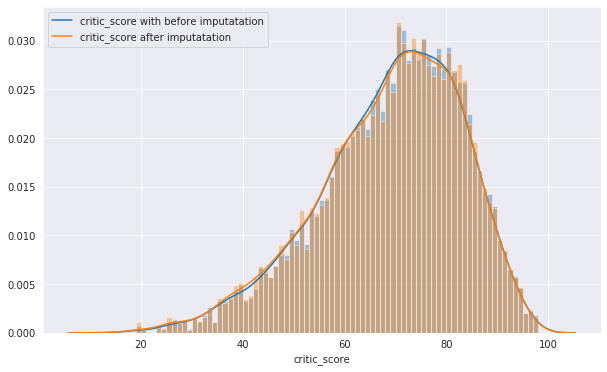

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(games['critic_score'].dropna(), 
             ax=ax, 
             bins=bins, 
             kde=True,
             kde_kws={'label': 'critic_score with before imputatation'},
             #label='critic_score with before imputatation'
             )
sns.distplot(games_test['critic_score'].dropna(), 
             ax=ax, 
             bins=bins, 
             kde=True,
             kde_kws={'label': 'critic_score after imputatation'},
             #label='critic_score after imputatation'
             )
plt.show()

In [47]:
games_test['user_score'] = games_test['user_score'].fillna(games_test.groupby('name')['user_score'].transform('median'))

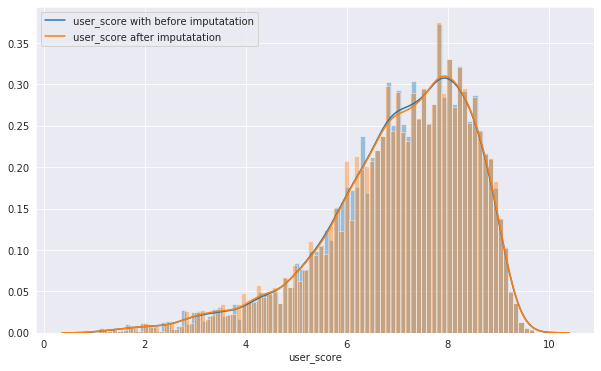

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(games[games['user_score'] > 1]['user_score'].dropna(), 
             ax=ax, 
             bins=bins, 
             kde=True,
             kde_kws={'label': 'user_score with before imputatation'},
             #label='user_score with before imputatation'
             )
sns.distplot(games_test[games_test['user_score'] > 1]['user_score'].dropna(), 
             ax=ax, 
             bins=bins, 
             kde=True,
             kde_kws={'label': 'user_score after imputatation'},
             #label='user_score after imputatation'
             )
plt.show()

In [49]:
games_test.isna().mean()*100

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      45.71
user_score        37.68
rating             0.00
total_sales        0.00
dtype: float64

- Distributions have the same form and parameters after imputation - lets use this technique for imputation on the main dataset;
- Around 6% and 3% of missing values for critic and user scores were restored, but there is still big amount of missing values in those columns that it is hard to handle having only this data;

In [50]:
games['critic_score'] = games['critic_score'].fillna(games.groupby('name')['critic_score'].transform('median'))
games['user_score'] = games['user_score'].fillna(games.groupby('name')['user_score'].transform('median'))
games.isna().mean()*100

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      45.71
user_score        37.68
rating             0.00
total_sales        0.00
dtype: float64

- Also it worths to try to see if there is some relationship between scores and sales;

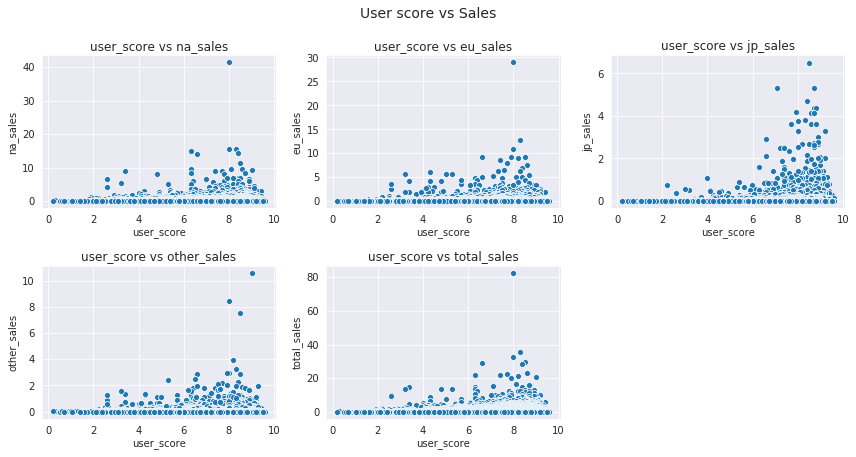

In [51]:
games_scores_vs_sales = games[games.user_score != -1].dropna()

fig, axs = plt.subplots(2, 
                        3, 
                        figsize=(12,6),
                        #sharex=True,
                        #sharey=True
                       )

i, j = 0, 0
for name in games_scores_vs_sales.columns:
    if name[-5:] == 'sales':
        sns.scatterplot(x=games_scores_vs_sales['user_score'], 
                        y=games_scores_vs_sales[name],
                        ax=axs[i, j]
                       )
        axs[i, j].set_title(f'user_score vs {name}')
        j+=1
        if j==3:
            j=0
            i+=1
        
fig.suptitle('User score vs Sales', y=1.05, fontsize=14)
fig.delaxes(axs[1,2])
plt.tight_layout()
plt.show()

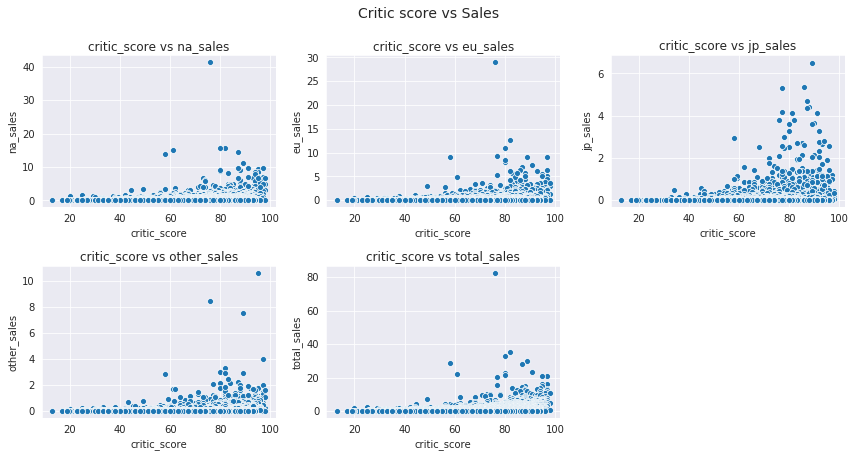

In [52]:
fig, axs = plt.subplots(2, 
                        3, 
                        figsize=(12,6),
                        #sharex=True,
                        #sharey=True
                       )

i, j = 0, 0
for name in games_scores_vs_sales.columns:
    if name[-5:] == 'sales':
        sns.scatterplot(x=games_scores_vs_sales['critic_score'], 
                        y=games_scores_vs_sales[name],
                        ax=axs[i, j]
                       )
        axs[i, j].set_title(f'critic_score vs {name}')
        j+=1
        if j==3:
            j=0
            i+=1
        
fig.suptitle('Critic score vs Sales', y=1.05, fontsize=14)
fig.delaxes(axs[1,2])
plt.tight_layout()
plt.show()

- Correlation is low for both columns, so this technique does not work here;

- There is one error value in year of release: there is the game released in 1985 on the platform that was released in 2004, которая вышла в 2004;

In [53]:
games[games.platform == 'DS']['year_of_release'].value_counts().sort_index()

1985      1
2004     23
2005    118
2006    201
2007    377
2008    492
2009    403
2010    323
2011    153
2012     23
2013      8
Name: year_of_release, dtype: int64

In [54]:
games[(games.platform == 'DS') & 
      (games.year_of_release == 1985)
     ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,nan,nan,T,0.02


In [55]:
display(len(games))
games.drop(games[(games.platform == 'DS') & 
                 (games.year_of_release == 1985)].index, 
                 inplace=True
          )
display(len(games))

16465

16464

### Conclusion

1. Missing values are handled in the following columns:
    - name;
    - year_of_release;
    - genre;
    - rating;
2. There are still rows with missing values in critic and user scores columns and part of user_score values with tbd;
3. Different techniques were tried to impute missing values in those columns but none of them gave a valid result;
4. Amount of remaining missing values is too high so it is not a good idea to ust remove it;
5. In order to use those columns it will be created different slices of the dataset without missing values;

## Exploratory data analysis

### Sales analysis by platform, selecting relevant time period for further analysis

- Lets consider how number of released games changes over the time;

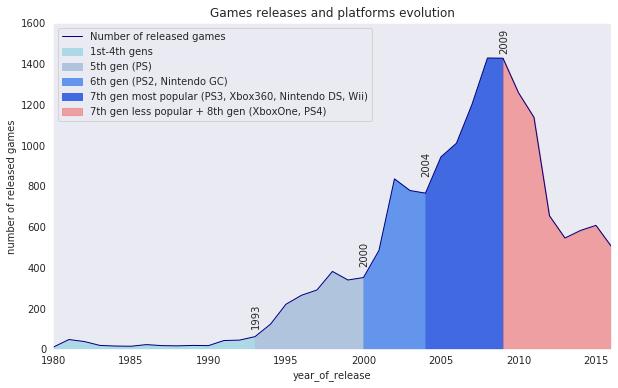

In [56]:
games_by_years = games.pivot_table(index='year_of_release', 
                                   values='name', 
                                   aggfunc='count'
                                  )

fig, ax = plt.subplots(figsize=(10,6))
p = games_by_years.plot(ax=ax, 
                        linestyle='-', 
                        color='navy', 
                        linewidth=1, 
                        ylim=(0, 1600),
                        grid=False
                       )

ax.fill_between(games_by_years.loc[1980:1993, 'name'].index, 
                games_by_years.loc[1980:1993, 'name'], 
                color='lightblue'
               )
ax.fill_between(games_by_years.loc[1993:2000, 'name'].index, 
                games_by_years.loc[1993:2000, 'name'], 
                color='lightsteelblue'
               )
ax.fill_between(games_by_years.loc[2000:2004, 'name'].index, 
                games_by_years.loc[2000:2004, 'name'], 
                color='cornflowerblue'
               )
ax.fill_between(games_by_years.loc[2004:2009, 'name'].index, 
                games_by_years.loc[2004:2009, 'name'], 
                color='royalblue'
               )
ax.fill_between(games_by_years.loc[2009:2016, 'name'].index, 
                games_by_years.loc[2009:2016, 'name'], 
                color='lightcoral', 
                alpha=.7
               )

ax.text(1992.75, 110, '1993', rotation=90)
ax.text(1999.75, 415, '2000', rotation=90)
ax.text(2003.75, 855, '2004', rotation=90)
ax.text(2008.75, 1460, '2009', rotation=90)

ax.legend(
          [
           'Number of released games', 
           '1st-4th gens', 
           '5th gen (PS)', 
           '6th gen (PS2, Nintendo GC)', 
           '7th gen most popular (PS3, Xbox360, Nintendo DS, Wii)', 
           '7th gen less popular + 8th gen (XboxOne, PS4)'
          ], 
          loc=2
         )

plt.ylabel('number of released games')
plt.title('Games releases and platforms evolution')
plt.show()

- There a few steep intervals of increasing of game releases:
    - 1993-1999: 5th generation of game platforms (Nintendo 64, Nintendo 64DD, PS);
    - 2000-2004: 6th generation of game platforms (Nintendo GameCube, Playstation 2) - the highest rate of increase;
    - 2005-2009: the first platform of Xbox, 7th generation of game platforms (Playstation 3, Xbox360, Nintendo DS, Wii) - the highest ever peak of realeased games;
    - 2010-2016: new versions of 7th generation of game platforms and 8th generation of game platforms (Playstation 4, XboxOne) - sharp decline probably related to not big difference between these platforms and the previous ones;

- Now check how sales changed over platforms;

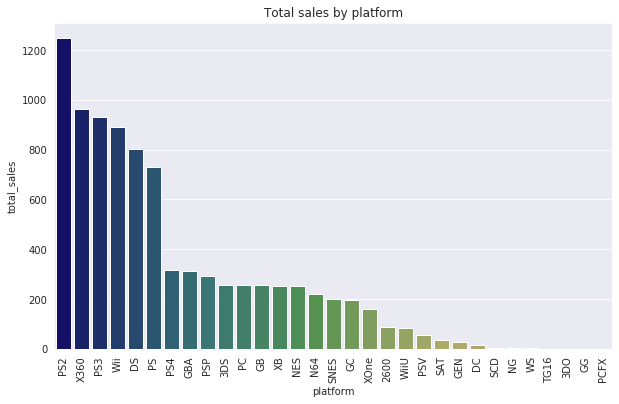

In [57]:
# grouping data by platform and calculating total sales
sales_by_platform = games.pivot_table(index='platform', 
                                      values='total_sales', 
                                      aggfunc='sum'
                                     ).sort_values(by=['total_sales'], 
                                                   ascending=False
                                                  )

# plotting distribution of total sales by platform
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_platform.index, 
            y=sales_by_platform['total_sales'],
            #palette='YlGnBu_r'
            palette='gist_earth'
           )

plt.title('Total sales by platform')
plt.xticks(rotation=90)
plt.show()

- There are clear leaders. But these are total sales, and for example PS1 exists sincs 1994, but Xbox360 exists just since 2006;
- Lets calculate yearly sales for all the platforms and show how many years a platform exists;

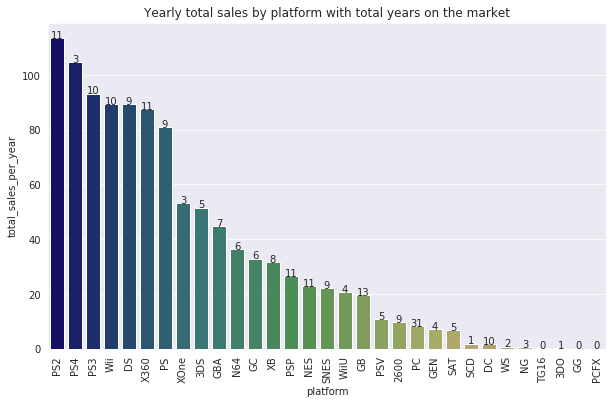

In [58]:
# counting total number of years that platform exists
sales_by_platform['total_years'] = games.pivot_table(index='platform', 
                                                     values='year_of_release', 
                                                     aggfunc=lambda x: x.max() - x.min()
                                                     )['year_of_release']

# counting yearly sales
sales_by_platform['total_sales_per_year'] = sales_by_platform['total_sales']/sales_by_platform['total_years']

# function for handling nans for fresh 2016 released platforms
def nans_handling(row):
    if row['total_years'] == 0:
        return row['total_sales']
    else:
        return row['total_sales_per_year']

# handling nans and sorting values
sales_by_platform['total_sales_per_year'] = sales_by_platform.apply(nans_handling, axis=1)
sales_per_year_by_platform_sorted = sales_by_platform.sort_values(by=['total_sales_per_year'], 
                                                                  ascending=False
                                                                 )

# plotting yearly sales by platform
plt.figure(figsize=(10,6))
bar = sns.barplot(x=sales_per_year_by_platform_sorted.index, 
            y=sales_per_year_by_platform_sorted['total_sales_per_year'],
            #palette='YlGnBu_r'
            palette='gist_earth'
           )

# plotting total years
for index, row in sales_per_year_by_platform_sorted.reset_index().iterrows():
    bar.text(row.name, 
             row.total_sales_per_year, 
             row.total_years, 
             ha='center',
            )

plt.title('Yearly total sales by platform with total years on the market')
plt.xticks(rotation=90)
plt.show()

- PS4 holds the second place in yearly sales, but there was no PS4 in the leaders in total sales distribution! It is only 3 years in the market. The same situation with XOne; 
- Lets make a scatter plot with yearly sales vs total sales and color data points with corresponding total years on the market;
- Lets create 3 categories depending on total years on the market: below 6 years (6 years is chosen because of it is an average period of time for releasing new platform) - new, between 6 and 12 - medium, and above 12 - old. It will be a parameter for coloring the points;
- From scatter plot lets try to choose yearly sales cut-off for successful platforms;

In [59]:
def total_years_flag(value):
    if value < 6:
        return 'new < 6'
    elif value >= 6 and value < 12:
        return '6 <= medium < 12'
    else:
        return '12 <= old'

sales_per_year_by_platform_sorted['total_years_flag'] = sales_per_year_by_platform_sorted['total_years'].apply(total_years_flag)

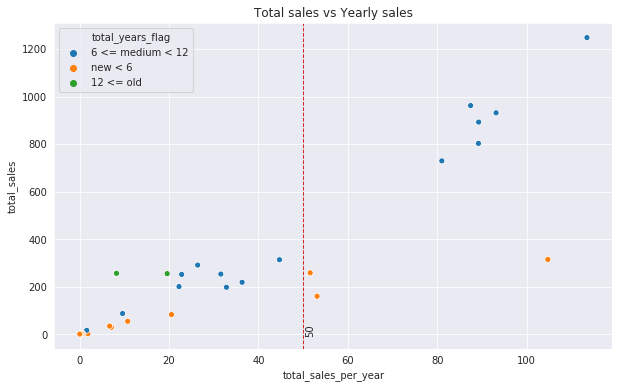

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=sales_per_year_by_platform_sorted['total_sales_per_year'], 
                y=sales_per_year_by_platform_sorted['total_sales'], 
                hue=sales_per_year_by_platform_sorted['total_years_flag']
               )
plt.axvline(50, 
            linewidth=1, 
            linestyle='--', 
            color='tab:red'
           )
plt.text(50.5, -1, '50', rotation=90)
plt.title('Total sales vs Yearly sales')
plt.show()

- There are 3 new platforms (PS4, XOne, 3DS), which are far from other new platfroms for both total and yearly sales. There is also a group of medium platforms on the upper right with high total-high yearly sales;
- It seems a good choice to select 50 million copies as a yearly sales cut-off for choosing successful platforms;

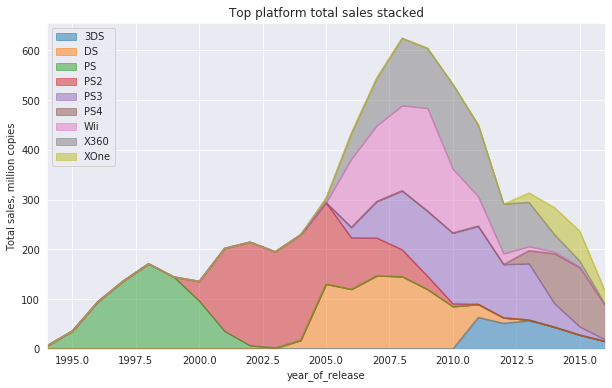

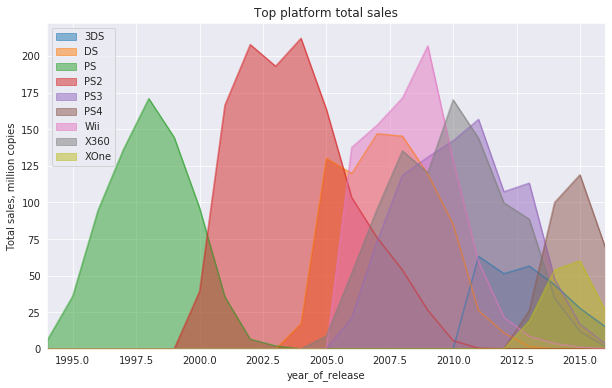

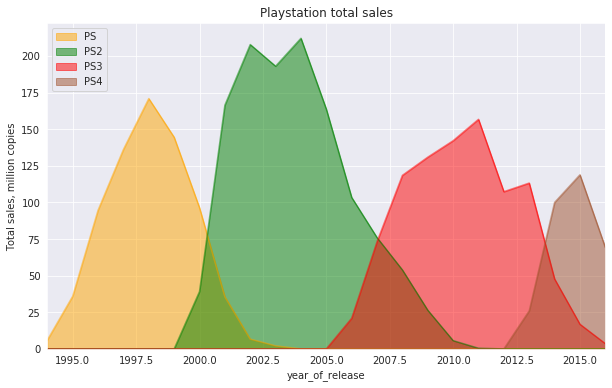

In [61]:
# selecting top platforms
top_platform_names = sales_per_year_by_platform_sorted[sales_per_year_by_platform_sorted['total_sales_per_year'] > 50].index

# slicing top platforms, grouping by year and platforms and calculating total sales
games_top_platforms = games.query('platform in @top_platform_names')
games_top_platforms_grouped = games_top_platforms.pivot_table(index='year_of_release', 
                                                              values='total_sales', 
                                                              columns='platform',
                                                              aggfunc='sum'
                                                             )

# handling missing values as imputing by 0
games_top_platforms_grouped.fillna(0, inplace=True)

# creating stacked area plot for top platforms
games_top_platforms_grouped.plot.area(stacked=True, 
                                      figsize=(10,6),
                                      alpha=0.5,
                                     )
plt.ylabel('Total sales, million copies')
plt.title('Top platform total sales stacked')
plt.legend(loc=2)

# plotting total sales distributions by years
games_top_platforms_grouped.plot.area(stacked=False, 
                                      figsize=(10,6),
                                      #alpha=0.5
                                     )
plt.ylabel('Total sales, million copies')
plt.title('Top platform total sales')
plt.legend(loc=2)

# plotting example of life spans of playstation platforms
games_top_platforms_grouped.loc[:, ['PS', 'PS2', 'PS3', 'PS4']].plot.area(stacked=False, 
                                                                          figsize=(10,6), 
                                                                          color=['orange', 'g', 'r', 'sienna'],
                                                                          #alpha=.5
                                                                          )
plt.ylabel('Total sales, million copies')
plt.title('Playstation total sales')
plt.legend(loc=2)

plt.show()

- Playstation example shows that average life span of a platform is approximatelly 10 years and it reaches its sales peak in 3-5 years;

- Now lets calculate life spans of top platforms and years it needs to reach the sales peak in a separate dataset, then plot the data;

In [62]:
# adding year when platform was released
sales_by_platform['start_year'] = games.pivot_table(index='platform', 
                                                     values='year_of_release', 
                                                     aggfunc='min'
                                                     )['year_of_release']

# updating the dataframe with top platforms
sales_per_year_by_platform_sorted = sales_by_platform.sort_values(by=['total_sales_per_year'], 
                                                                  ascending=False
                                                                 )

top_platform_names = sales_per_year_by_platform_sorted[sales_per_year_by_platform_sorted['total_sales_per_year'] > 50].index

games_top_platforms = games.query('platform in @top_platform_names')
games_top_platforms_grouped = games_top_platforms.pivot_table(index='year_of_release', 
                                                              values='total_sales', 
                                                              columns='platform',
                                                              aggfunc='sum'
                                                             )

In [63]:
# creating a dataframe to extract sales peak year
gtp = games_top_platforms.pivot_table(index='year_of_release', 
                                      values='total_sales', 
                                      columns='platform',
                                      aggfunc='sum'
                                     )
gtp.fillna(0, inplace=True)

In [64]:
# extracting sales peak year
max_sale_year = []

for name, column in gtp.reset_index().iteritems():
    if name != 'year_of_release':
        max_sale_year.append(gtp.reset_index()[gtp.reset_index()[name] == column.max()]['year_of_release'].values[0])

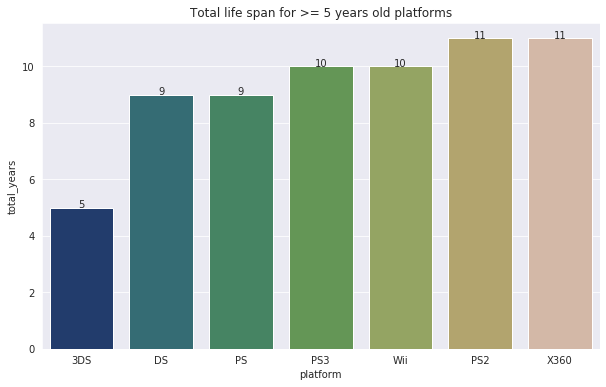

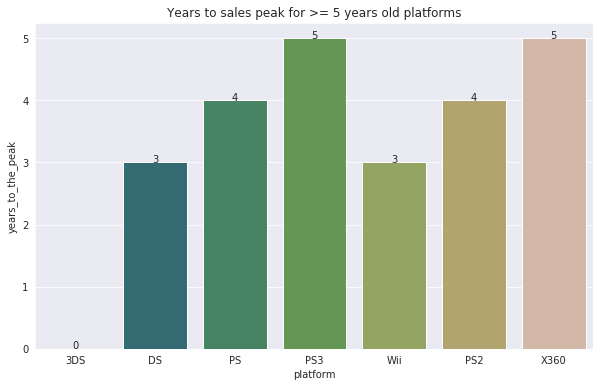

In [65]:
# copying dataframe with top platforms, adding sales peak year and calculating years to the sales peak
tpss = sales_per_year_by_platform_sorted[sales_per_year_by_platform_sorted['total_sales_per_year'] > 50].sort_index()
tpss['max_sale_year'] = max_sale_year
tpss['years_to_the_peak'] = tpss['max_sale_year'] - tpss['start_year']

# function to mark very new platforms as nan in order to remove it then (5 years is a an average time to the sales peak)
def five_years_interval(row):
    if (2016-row['start_year']) < 5:
        return np.nan
    else:
        return row['years_to_the_peak']

# removing very new platforms and changing data type of years to the peak column
tpss['years_to_the_peak'] = tpss.apply(five_years_interval, axis=1)
tpss.dropna(inplace=True)
tpss['years_to_the_peak'] = tpss['years_to_the_peak'].astype('int')

tpss = tpss.sort_values(by=['total_years'])

# plotting distribution of top platforms life span excluding new ones
fig, ax = plt.subplots(figsize=(10,6))
bar_1 = sns.barplot(x=tpss.index,
                    y=tpss['total_years'],
                    palette='gist_earth'
                   )
plt.title('Total life span for >= 5 years old platforms')

# plotting life span on top of each bar
for index, row in tpss.reset_index().iterrows():
    bar_1.text(row.name, 
               row.total_years, 
               row.total_years, 
               ha='center',
               )

# plotting years to the sales peak by top platforms excluding new ones
fig, ax = plt.subplots(figsize=(10,6))
bar_2 = sns.barplot(x=tpss.index,
            y=tpss['years_to_the_peak'],
            palette='gist_earth'
           )
plt.title('Years to sales peak for >= 5 years old platforms')

# plotting years to the sales peak on top of each bar
for index, row in tpss.reset_index().iterrows():
    bar_2.text(row.name, 
               row.years_to_the_peak, 
               row.years_to_the_peak, 
               ha='center',
               )

plt.show()

- It shows that average life span of a top platform is around 9-11 years, and it takes 3-5 years in average to reach the sales peak. There is one xception - 3DS - which is around 5 years on the market and reached its sales peak in the year of release, which is a randomness rather then a trend;
- Summarizing all above it can be concluded that optimal relevent period for further analysis is last **5 years (2012-2016)**, because of 5 years ago the platforms which are in the sales peak right now or will be there in the near future were released;

In [66]:
display(games.shape[0])
games_actual = games[games.year_of_release > 2011]
display(games_actual.shape[0])
games_actual.isna().mean()*100

16464

2886

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      41.51
user_score        37.66
rating             0.00
total_sales        0.00
dtype: float64

- Hence here are conclusions:
    1. The most profitable platforms in total sales in descending order: PS2, X360, PS3;
    2. The most profitable platforms in yearly sales in descending order: PS2, PS4, PS3;
    3. PS4 and XOne are the most perspective platforms and can show the highest grow in the following 2017 year;
    4. All the other platforms are in the phase of total sales decreasing;

- Now have a look at distributions of total sales of all the top platforms on the boxplot;

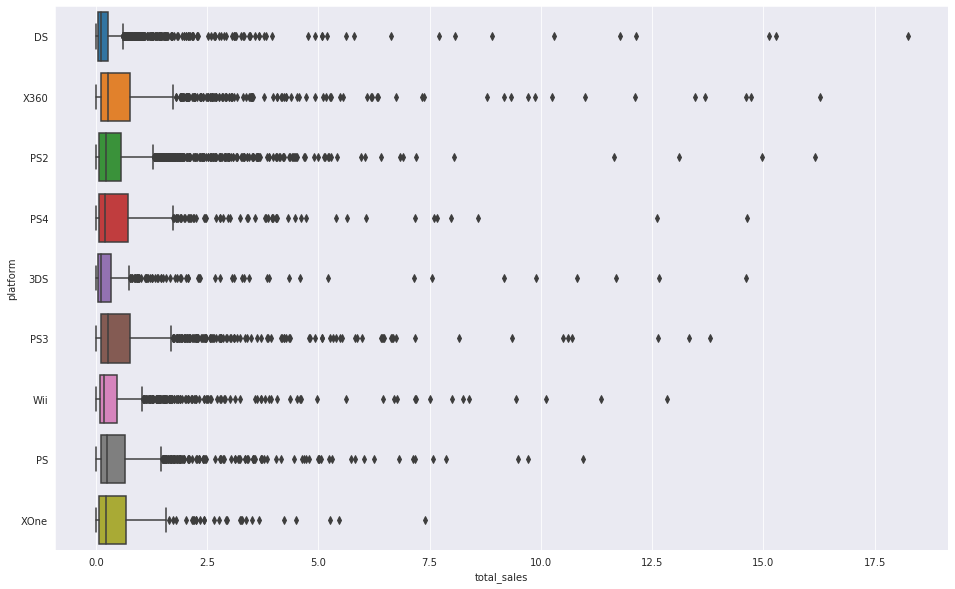

In [67]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(x=games_top_platforms[games_top_platforms['total_sales'] < 20]['total_sales'], 
            y=games_top_platforms[games_top_platforms['total_sales'] < 20]['platform']
           )
plt.show()

- It is noted the typical form of distributions for all the platforms: highly right skewed with a long tail of high values and shifted mediana towards the first quartile;
- The highest IQR is for platform leaders: Playstation (PS3, PS4) and Xbox (X360, XOne), probably because of these platforms have more games released;

- Now have a look at scatter plots of user and critical scores vs total sales by platforms and their pearson correlation coefficients;

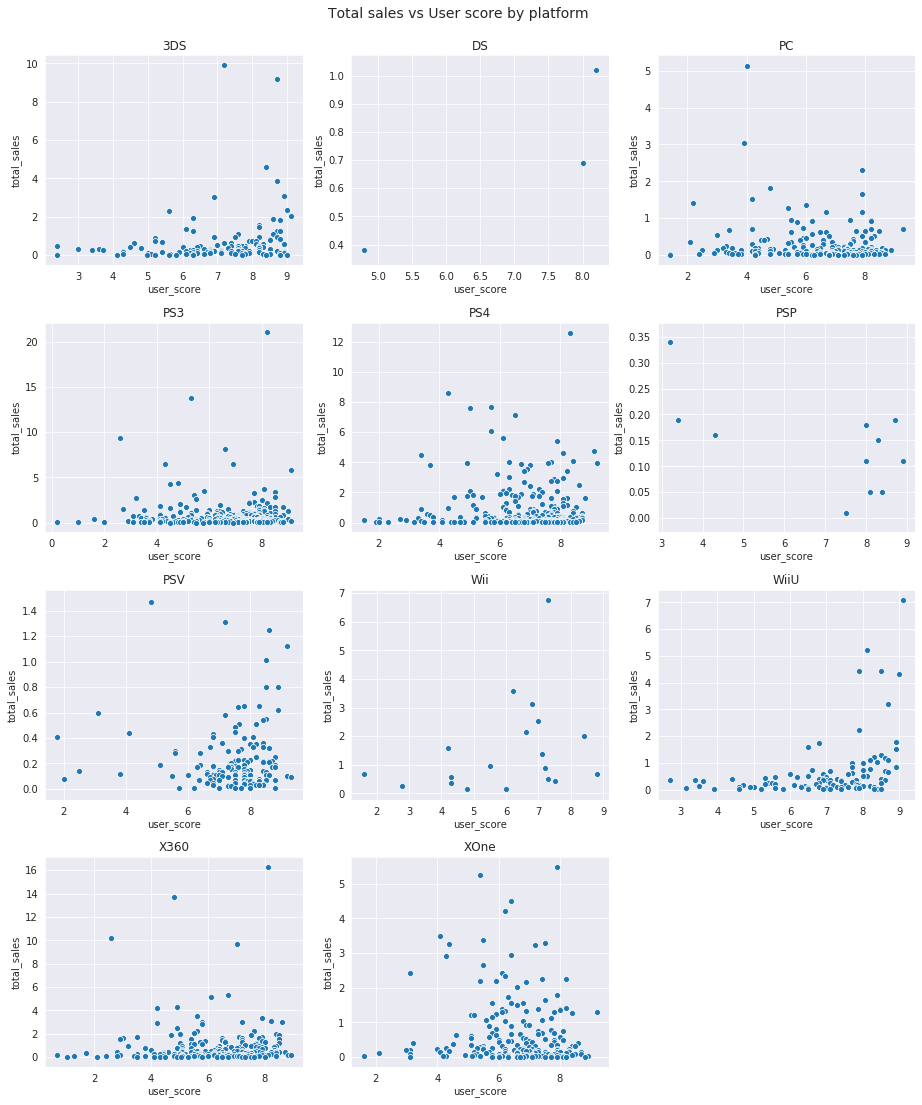

Total sales vs User score by platform Pearson: 

Platfrom 3DS has pearson = 0.2
Platfrom DS has pearson = 0.88
Platfrom PC has pearson = -0.13
Platfrom PS3 has pearson = -0.0
Platfrom PS4 has pearson = -0.02
Platfrom PSP has pearson = -0.62
Platfrom PSV has pearson = 0.0
Platfrom Wii has pearson = 0.32
Platfrom WiiU has pearson = 0.37
Platfrom X360 has pearson = 0.01
Platfrom XOne has pearson = -0.09


In [68]:
row_number = 4
col_number = 3
fig, axs = plt.subplots(row_number, 
                        col_number, 
                        figsize=(13,15), 
                        #sharex=True, 
                        #sharey=True
                       )
pearsons_user = []

i, j = 0, 0

df = games_actual[games_actual.user_score > -1].dropna()
for name, group in df.groupby('platform'):
    sns.scatterplot(x=df[df.platform == name]['user_score'], 
                    y=df[df.platform == name]['total_sales'],
                    ax=axs[i, j]
                   )
    axs[i, j].set_title(name)
    j+=1
    if j==col_number:
        i+=1
        j=0
    pearsons_user.append((name, 
                          round(df[df.platform == name]['user_score'].corr(df[df.platform == name]['total_sales']), 
                                2)
                         )
                        )
    
fig.suptitle('Total sales vs User score by platform', 
             y=1.02, 
             fontsize=14
            )
fig.delaxes(axs[3,2])
plt.tight_layout()
plt.show()

print('Total sales vs User score by platform Pearson: ')
print('')
for p in pearsons_user:
    print(f'Platfrom {p[0]} has pearson = {p[1]}')

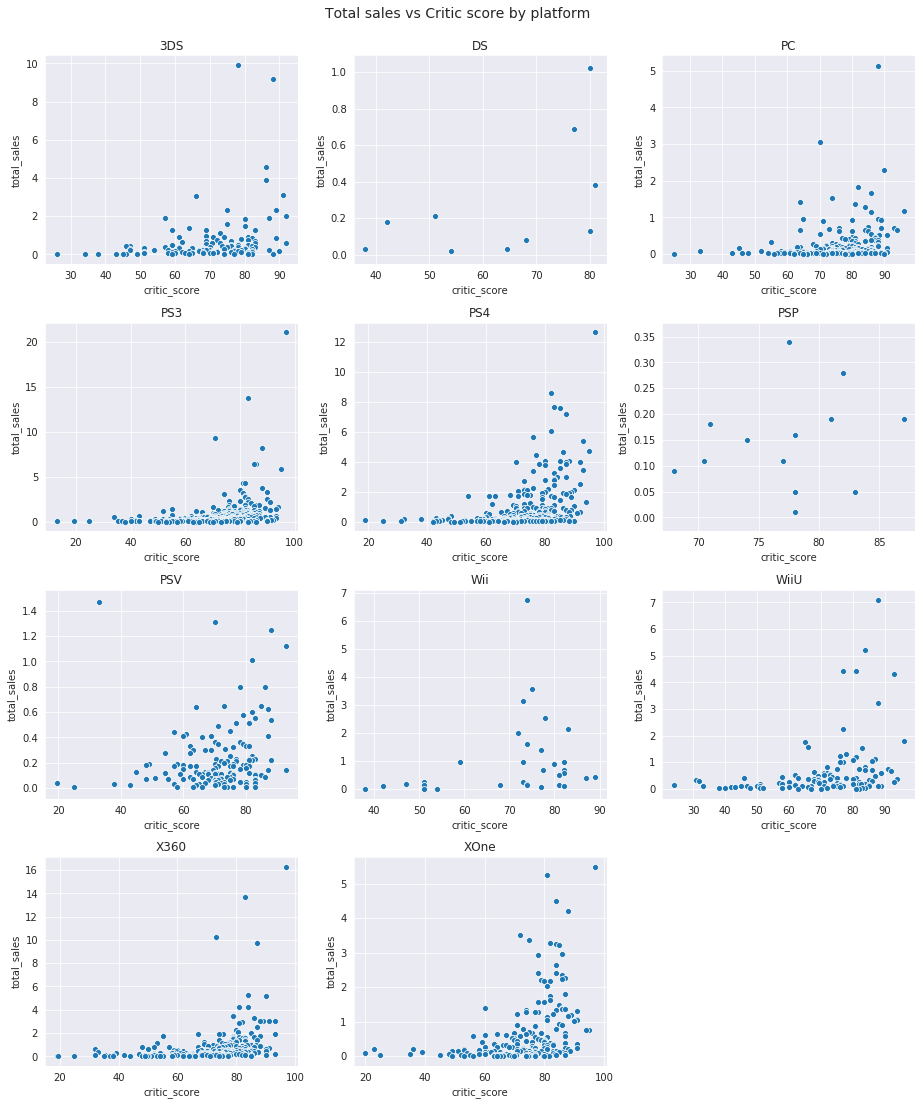

Total sales vs User score by platform Pearson: 

Platfrom 3DS has pearson = 0.29
Platfrom DS has pearson = -0.22
Platfrom PC has pearson = 0.23
Platfrom PS3 has pearson = 0.31
Platfrom PS4 has pearson = 0.39
Platfrom PSP has pearson = -0.0
Platfrom PSV has pearson = 0.13
Platfrom Wii has pearson = -0.09
Platfrom WiiU has pearson = 0.32
Platfrom X360 has pearson = 0.32
Platfrom XOne has pearson = 0.38


In [69]:
row_number = 4
col_number = 3
fig, axs = plt.subplots(row_number, 
                        col_number, 
                        figsize=(13,15), 
                        #sharex=True, 
                        #sharey=True
                       )
pearson_critic = []

i, j = 0, 0

df_critic = games_actual[games.platform != 'GB'].dropna()
for name, group in df_critic.groupby('platform'):
    sns.scatterplot(x=df_critic[df_critic.platform == name]['critic_score'], 
                    y=df_critic[df_critic.platform == name]['total_sales'],
                    ax=axs[i, j]
                   )
    axs[i, j].set_title(name)
    j+=1
    if j==col_number:
        i+=1
        j=0
    pearson_critic.append((name, 
                           round(df[df.platform == name]['critic_score'].corr(df[df.platform == name]['total_sales']), 
                                 2)
                          )
                         )
fig.delaxes(axs[3,2])

fig.suptitle('Total sales vs Critic score by platform', 
             y=1.02, 
             fontsize=14
            )
plt.tight_layout()
plt.show()

print('Total sales vs User score by platform Pearson: ')
print('')
for p in pearson_critic:
    print(f'Platfrom {p[0]} has pearson = {p[1]}')

- In general, there is no linear relationships between user and critic scores and total sales, because of pearson coefficient does not exceed 0.3 and 0.4 or go below -0.2 and -0.3 respectively. There is a couple of exceptions but it is due to low number of data points;

### Sales analysis by genre

- Lets look at sales distributions by genre and find the most profitable genres. Because of by the moment of 2012 (beginning of chosen relevent period of time) all the genres were already in the market, there is no need to calculate yearly sales and total sales is enough to analyse sales;

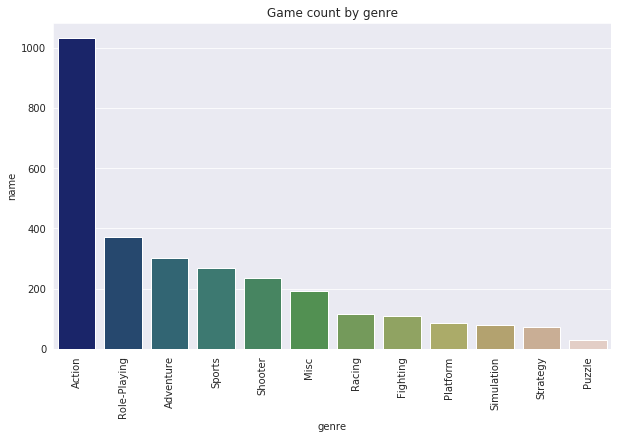

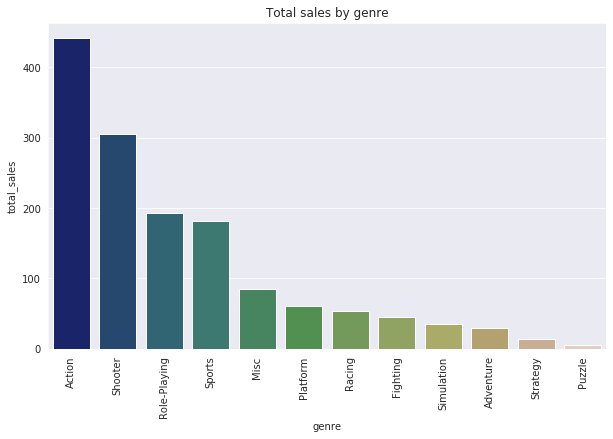

In [70]:
# grouping by genres and calculating number of games released
counts_by_genre = games_actual.pivot_table(index='genre', 
                                           values='name', 
                                           aggfunc='count'
                                           ).sort_values(by=['name'], 
                                                         ascending=False
                                                        )

# plotting number of games released by genres
plt.figure(figsize=(10,6))
sns.barplot(x=counts_by_genre.index, 
            y=counts_by_genre['name'],
            palette='gist_earth'
           )

plt.title('Game count by genre')
plt.xticks(rotation=90)

# grouping by genres and calculating total sales
sales_by_genre = games_actual.pivot_table(index='genre', 
                                          values='total_sales', 
                                          aggfunc='sum'
                                          ).sort_values(by=['total_sales'], 
                                                        ascending=False
                                                        )

# plotting total sales by genres
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_genre.index, 
            y=sales_by_genre['total_sales'],
            palette='gist_earth'
           )

plt.title('Total sales by genre')
plt.xticks(rotation=90)
plt.show()

- Action games lead by a huge margin both in number of released games and total sales;
- It is interesting to note tha shooter games has low number of released games but relatively high total sales comparing to rof example role-playing and adventure;
- Adventure games in contrast have low sales having high number of released games;

### Conclusion

1. **Relevant period of time** for futher analysis games success patterns was chosen as **5 years**, because of average life span of a platform is 10 years and it takes in average 5 years to reach the sales peak, so platforms which were released 5 years ago right now are on the sales peak or will be there in the nearest future. The further analysis uses a new dataframe of the relevant period of time;
2. The most profitable platforms in total sales in descending order: PS2, X360, PS3;
3. The most profitable platforms in yearly sales in descending order: PS2, PS4, PS3;
4. PS4 and XOne are the most perspective platforms and can show the highest grow in the following 2017 year;
6. All the other platforms are in the phase of total sales decreasing;
7. In general, there is no linear relationships between user and critic scores and total sales;

## Analysing typical users by regions

- For each of users from 5 regions in the data lets define the following:
    - Top-5 the most popular platforms;
    - Top-5 the most popular genres;
    - If ESRB rating affects total sales in the regions;

### Popular platforms

In [71]:
na_sales = games_actual[['platform', 'na_sales']]
eu_sales = games_actual[['platform', 'eu_sales']]
jp_sales = games_actual[['platform', 'jp_sales']]
other_sales = games_actual[['platform', 'other_sales']]

In [72]:
na_sales_pivoted = na_sales.pivot_table(index='platform', 
                                        values='na_sales', 
                                        aggfunc='sum'
                                       ).sort_values(by=['na_sales'], 
                                                     ascending=False
                                                    )

eu_sales_pivoted = eu_sales.pivot_table(index='platform', 
                                        values='eu_sales', 
                                        aggfunc='sum'
                                       ).sort_values(by=['eu_sales'], 
                                                     ascending=False
                                                    )

jp_sales_pivoted = jp_sales.pivot_table(index='platform', 
                                        values='jp_sales', 
                                        aggfunc='sum'
                                       ).sort_values(by=['jp_sales'], 
                                                     ascending=False
                                                    )

other_sales_pivoted = other_sales.pivot_table(index='platform', 
                                              values='other_sales', 
                                              aggfunc='sum'
                                             ).sort_values(by=['other_sales'], 
                                                           ascending=False
                                                          )

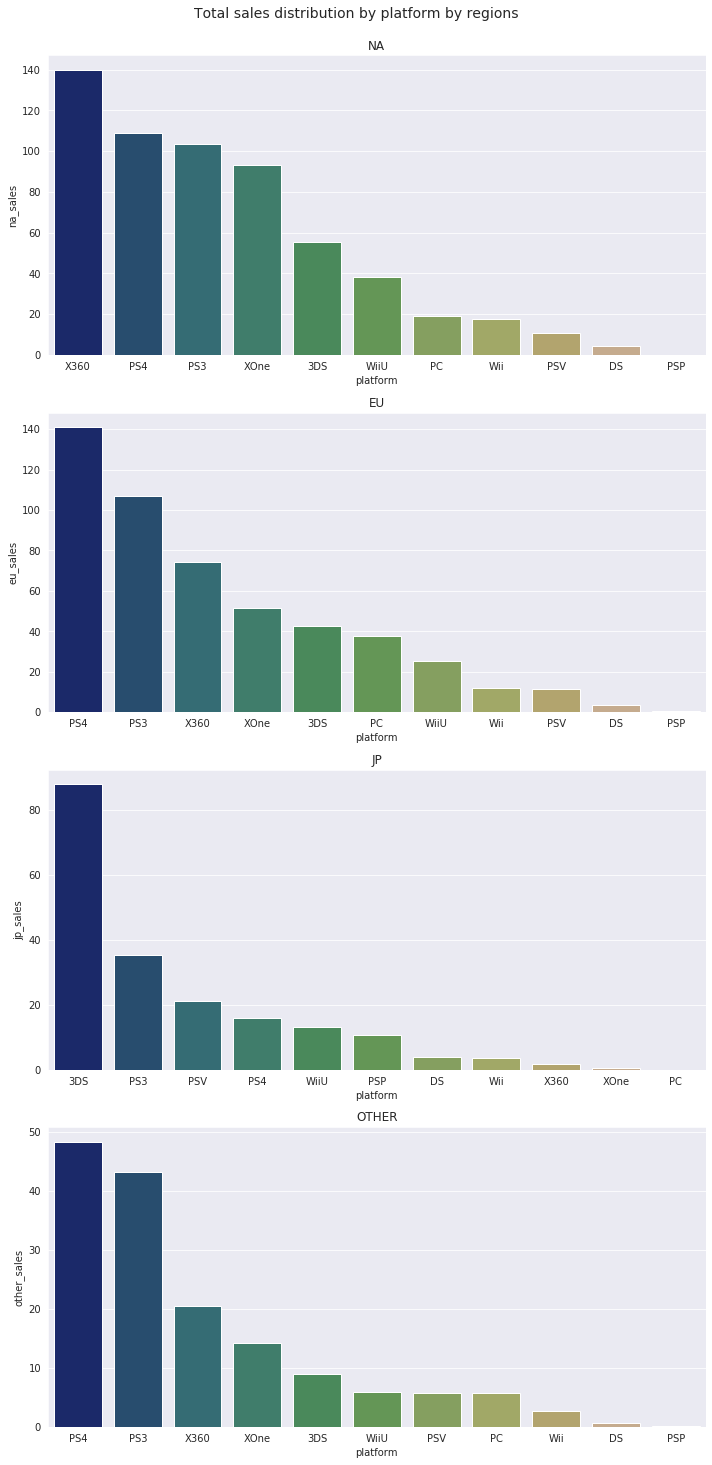

In [73]:
fig, axs = plt.subplots(4, 1, figsize=(10,20))

i=0

for index, region in enumerate([na_sales_pivoted, eu_sales_pivoted, jp_sales_pivoted, other_sales_pivoted]):
    sns.barplot(x=region.index,
                y=region.iloc[:,0],
                palette='gist_earth',
                ax=axs[i]
                )
    if index < 3:
        axs[i].set_title(region.columns[0][:2].upper())
    else:
        axs[i].set_title(region.columns[0][:5].upper())
    i+=1

fig.suptitle('Total sales distribution by platform by regions', 
             y=1.015, 
             fontsize=14
            )
plt.tight_layout()
plt.show()

- For all the regions except Japan the first 4 popular platforms are PS4, PS4, X360, XOne;
- In Japan the absolute leader is 3DS, PS3, PSV and PS4 are behind it. It mostly relates to the fact that 3DS is made in Japan and also its functionality is quite different from Xbox and Playstaton;
- In North America region people prefer X360, probably because of Xbox is made in USA. PS4, PS3 and XOne are behind it;
- Europeans are more conservative, as people from other world, preferring more older brand Playstation: PS4 and PS3. Platforms from Xbox are behind Playstation ones as in other world; 
- **Sum up:** For all the regions except Japan the most popular platforms are *PS4, PS4, X360, XOne*. In Japan the absolute leader is *3DS and platforms of Playstation*, including portable ones;

### Popular genres

- The data that will be constructed for this section will be also used in the next one, so beside genre data lets also prepare rating-related data;

In [74]:
na_genres = games_actual[['genre', 'na_sales', 'rating']]
eu_genres = games_actual[['genre', 'eu_sales', 'rating']]
jp_genres = games_actual[['genre', 'jp_sales', 'rating']]
other_genres = games_actual[['genre', 'other_sales', 'rating']]

In [75]:
# for all the regions creating pivot tables grouping sales by genre and rating, handling nans and copying the specific columns
na_genres_pivoted = na_genres.pivot_table(index='genre', 
                                          values='na_sales',
                                          columns='rating',
                                          aggfunc='sum',
                                          margins=True
                                         )
na_genres_pivoted.fillna(0, inplace=True)
copy_na_genres_pivoted = na_genres_pivoted[['E', 'E10+', 'T', 'M']]



eu_genres_pivoted = eu_genres.pivot_table(index='genre', 
                                          values='eu_sales',
                                          columns='rating',
                                          aggfunc='sum',
                                          margins=True
                                         )
eu_genres_pivoted.fillna(0, inplace=True)
copy_eu_genres_pivoted = eu_genres_pivoted[['E', 'E10+', 'T', 'M']]



jp_genres_pivoted = jp_genres.pivot_table(index='genre', 
                                          values='jp_sales',
                                          columns='rating',
                                          aggfunc='sum',
                                          margins=True
                                         )
jp_genres_pivoted.fillna(0, inplace=True)
copy_jp_genres_pivoted = jp_genres_pivoted[['E', 'E10+', 'T', 'M']]



other_genres_pivoted = other_genres.pivot_table(index='genre', 
                                                values='other_sales',
                                                columns='rating',
                                                aggfunc='sum',
                                                margins=True
                                               )
other_genres_pivoted.fillna(0, inplace=True)
copy_other_genres_pivoted = other_genres_pivoted[['E', 'E10+', 'T', 'M']]

In [76]:
# changing column names to integers for more convenient column names extraction using specific row values
copy_na_genres_pivoted.columns = [i for i in range(4)]
copy_eu_genres_pivoted.columns = [i for i in range(4)]
copy_jp_genres_pivoted.columns = [i for i in range(4)]
copy_other_genres_pivoted.columns = [i for i in range(4)]

In [77]:
# for each row (genre) selecting value of a column (rating) having the highest sales
copy_na_genres_pivoted['max_sales_rating'] = copy_na_genres_pivoted.apply(lambda x: copy_na_genres_pivoted.columns[x.argmax()], 
                                                                          axis=1
                                                                         )
copy_eu_genres_pivoted['max_sales_rating'] = copy_eu_genres_pivoted.apply(lambda x: copy_eu_genres_pivoted.columns[x.argmax()], 
                                                                          axis=1
                                                                         )
copy_jp_genres_pivoted['max_sales_rating'] = copy_jp_genres_pivoted.apply(lambda x: copy_jp_genres_pivoted.columns[x.argmax()], 
                                                                          axis=1
                                                                         )
copy_other_genres_pivoted['max_sales_rating'] = copy_other_genres_pivoted.apply(lambda x: copy_other_genres_pivoted.columns[x.argmax()], 
                                                                                axis=1
                                                                               )

In [78]:
# coming back to original column names, saving max_sales_rating column to the original dataframe, removing the last unused 
# row and changing sales column name
copy_na_genres_pivoted['max_sales_rating'] = copy_na_genres_pivoted['max_sales_rating'].map({0: 'E', 
                                                                                             1: 'E10+', 
                                                                                             2: 'T', 
                                                                                             3: 'M'
                                                                                            }
                                                                                           )
copy_na_genres_pivoted.columns = ['E', 'E10+', 'T', 'M', 'max_sales_rating']
na_genres_pivoted['max_sales_rating'] = copy_na_genres_pivoted['max_sales_rating']
na_genres_pivoted.drop(index='All', inplace=True)
na_genres_pivoted.columns = ['E', 'E10+', 'M', 'T', 'na_sales', 'max_sales_rating']



copy_eu_genres_pivoted['max_sales_rating'] = copy_eu_genres_pivoted['max_sales_rating'].map({0: 'E', 
                                                                                             1: 'E10+', 
                                                                                             2: 'T', 
                                                                                             3: 'M'
                                                                                            }
                                                                                           )
copy_eu_genres_pivoted.columns = ['E', 'E10+', 'T', 'M', 'max_sales_rating']
eu_genres_pivoted['max_sales_rating'] = copy_eu_genres_pivoted['max_sales_rating']
eu_genres_pivoted.drop(index='All', inplace=True)
eu_genres_pivoted.columns = ['E', 'E10+', 'M', 'T', 'eu_sales', 'max_sales_rating']



copy_jp_genres_pivoted['max_sales_rating'] = copy_jp_genres_pivoted['max_sales_rating'].map({0: 'E', 
                                                                                             1: 'E10+', 
                                                                                             2: 'T', 
                                                                                             3: 'M'
                                                                                            }
                                                                                           )
copy_jp_genres_pivoted.columns = ['E', 'E10+', 'T', 'M', 'max_sales_rating']
jp_genres_pivoted['max_sales_rating'] = copy_jp_genres_pivoted['max_sales_rating']
jp_genres_pivoted.drop(index='All', inplace=True)
jp_genres_pivoted.columns = ['E', 'E10+', 'M', 'T', 'jp_sales', 'max_sales_rating']



copy_other_genres_pivoted['max_sales_rating'] = copy_other_genres_pivoted['max_sales_rating'].map({0: 'E', 
                                                                                                   1: 'E10+', 
                                                                                                   2: 'T', 
                                                                                                   3: 'M'
                                                                                                  }
                                                                                                 )
copy_other_genres_pivoted.columns = ['E', 'E10+', 'T', 'M', 'max_sales_rating']
other_genres_pivoted['max_sales_rating'] = copy_other_genres_pivoted['max_sales_rating']
other_genres_pivoted.drop(index='All', inplace=True)
other_genres_pivoted.columns = ['E', 'E10+', 'M', 'T', 'other_sales', 'max_sales_rating']


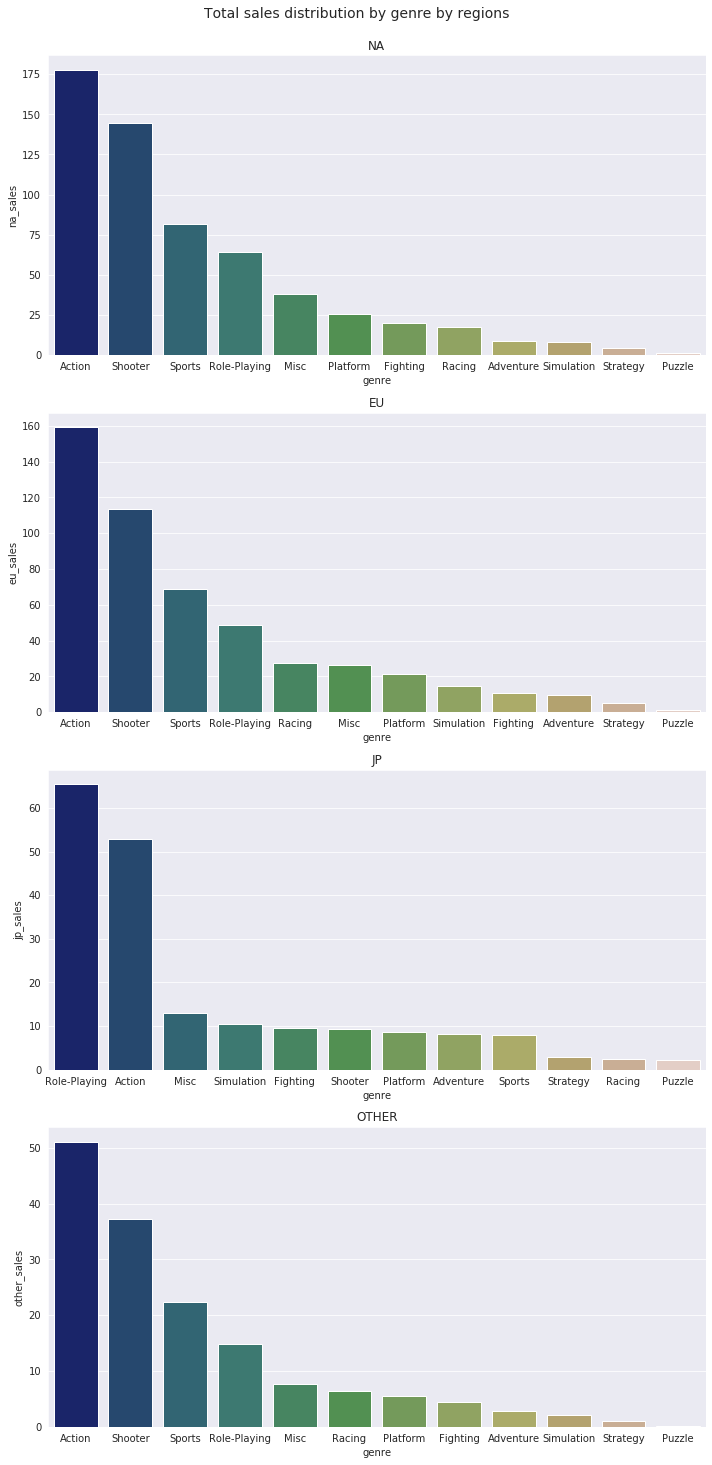

In [79]:
# plotting total sales distributions by platforms by regions
fig, axs = plt.subplots(4, 1, figsize=(10,20))

i=0

for index, region in enumerate([na_genres_pivoted.sort_index(by='na_sales', ascending=False), 
                                eu_genres_pivoted.sort_index(by='eu_sales', ascending=False), 
                                jp_genres_pivoted.sort_index(by='jp_sales', ascending=False), 
                                other_genres_pivoted.sort_index(by='other_sales', ascending=False)
                               ]
                              ):
    sns.barplot(x=region.index,
                y=region.iloc[:,4],
                palette='gist_earth',
                ax=axs[i]
                )
    if index < 3:
        axs[i].set_title(region.columns[4][:2].upper())
    else:
        axs[i].set_title(region.columns[4][:5].upper())
    i+=1

fig.suptitle('Total sales distribution by genre by regions', 
             y=1.015, 
             fontsize=14
            )
plt.tight_layout()
plt.show()

- For all the regions except Japan the most popular genres are action, shooter, sports and role-playing. Action is an absolute leader everywhere and shooter confidently takes the second place;
- Role-playing is a leader in Japan. Together with action, which is the second, these two genres are far away from following misc and simulation;
- Popularity of action is probably related to the fact that it is a quite broad genre containing variety of different game scenarios;
- Shooter has a different story: as was shown in preious sections this genre has low number of released games but high total sales. The reason of popularity is probably the same as for action: variety of possible scenarios. Only in Japan shooter disappears in all the other unpopular genres, which also points on differences in taste of Japan and other world;
- Sports are popular everywhere but in Japan. That is probably related to the fact that sports in Japan is not that developed and popular as in other mentioned regions;
- Role-playing is very popular in Asia and particulary in Japan. In other regions it holds the 4th place and perhaps it closes the list of clear genre leaders, behind it all the genres are more or less equally distributed ;
- **Sum up:** For all the regions except Japan the most popular genres are action, shooter, sports and role-playing. Role-playing is a leader in Japan together with action. *The most popular genres are action, shooter, role-playing, sports*;

### ESRB rating

- For all the regions lets show two distributions: sales distributions by ratings on the left, sales distributions by genres with a value of a rating, which brought the highest sales to this particular genre. That is a good way to understand sales distributions by ratings because ratings are highly related to the genres;

In [80]:
# converting rating to categorical variable in order to have better control on sorting
games_actual['rating'] = pd.Categorical(games_actual['rating'], 
                                        categories=['E', 'E10+', 'T', 'M'],
                                        ordered=True
                                       )

na_rating = games_actual[['rating', 'na_sales']]
eu_rating = games_actual[['rating', 'eu_sales']]
jp_rating = games_actual[['rating', 'jp_sales']]
other_rating = games_actual[['rating', 'other_sales']]

In [81]:
na_rating_pivoted = na_rating.pivot_table(index='rating', 
                                          values='na_sales', 
                                          aggfunc='sum'
                                         )

eu_rating_pivoted = eu_rating.pivot_table(index='rating', 
                                          values='eu_sales', 
                                          aggfunc='sum'
                                         )

jp_rating_pivoted = jp_rating.pivot_table(index='rating', 
                                          values='jp_sales', 
                                          aggfunc='sum'
                                         )

other_rating_pivoted = other_rating.pivot_table(index='rating', 
                                                values='other_sales', 
                                                aggfunc='sum'
                                               )

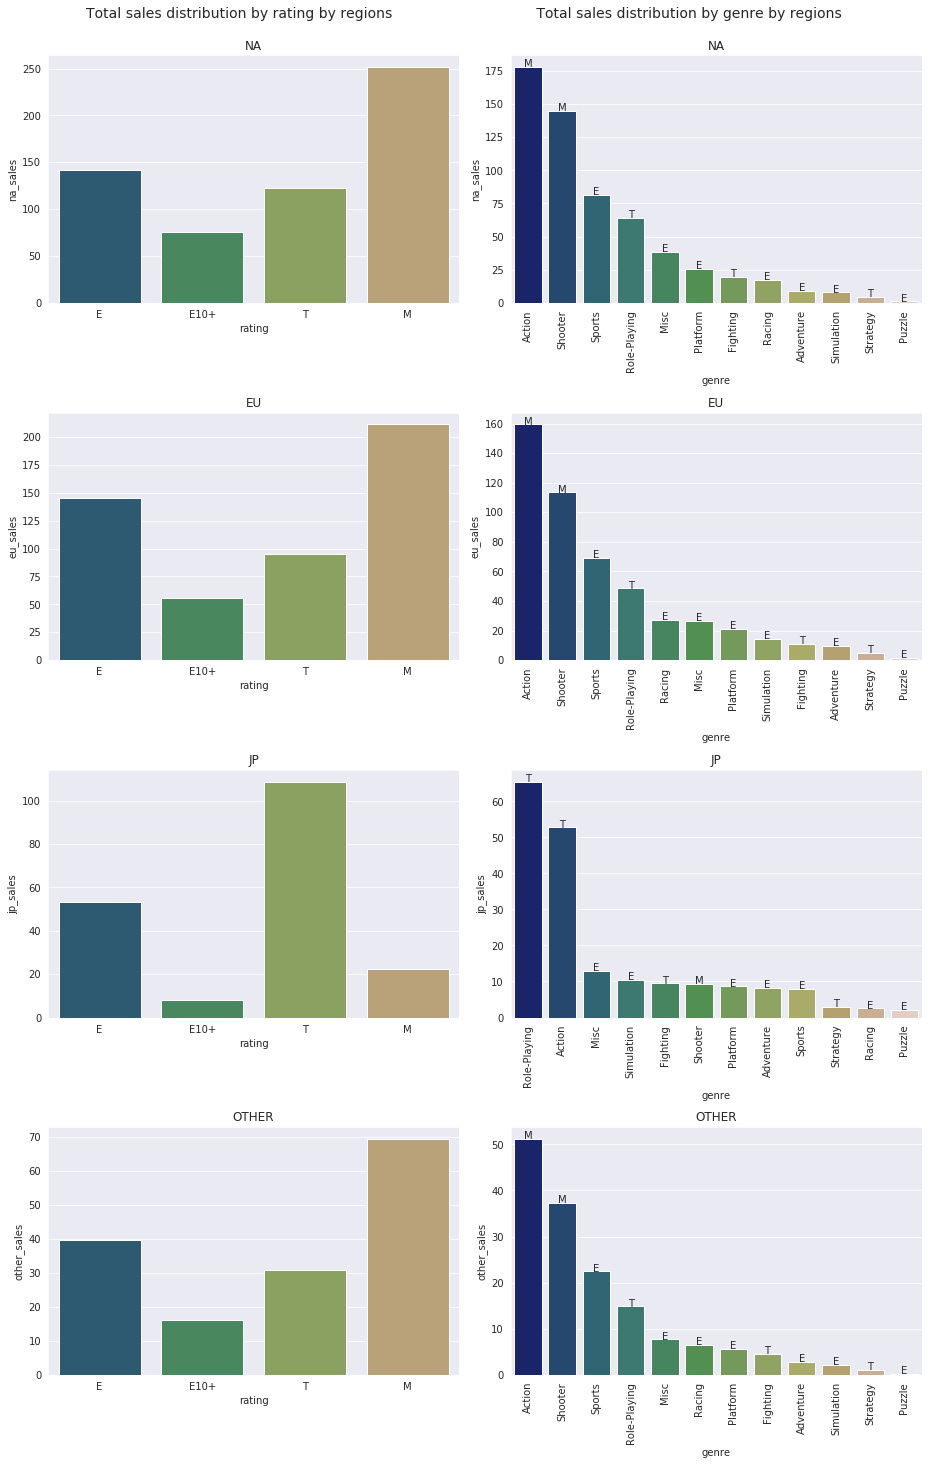

In [82]:
fig, axs = plt.subplots(4, 2, figsize=(13,20))

i, j = 0, 0

for index, region in enumerate([(na_rating_pivoted, na_genres_pivoted.sort_index(by='na_sales', ascending=False)), 
                                (eu_rating_pivoted, eu_genres_pivoted.sort_index(by='eu_sales', ascending=False)), 
                                (jp_rating_pivoted, jp_genres_pivoted.sort_index(by='jp_sales', ascending=False)), 
                                (other_rating_pivoted, other_genres_pivoted.sort_index(by='other_sales', ascending=False))]):
    sns.barplot(x=region[0].index,
                y=region[0].iloc[:, 0],
                palette='gist_earth',
                ax=axs[i, j]
                )
    bar_3 = sns.barplot(x=region[1].index,
                        y=region[1].iloc[:,4],
                        palette='gist_earth',
                        ax=axs[i, j+1]
                        )
    axs[i, j+1].set_xticklabels(axs[i, j+1].get_xticklabels(),rotation = 90)
    if index < 3:
        axs[i, j].set_title(region[0].columns[0][:2].upper())
        axs[i, j+1].set_title(region[1].columns[4][:2].upper())
    else:
        axs[i, j].set_title(region[0].columns[0][:5].upper())
        axs[i, j+1].set_title(region[1].columns[4][:5].upper())
    for index, row in region[1].reset_index().iterrows():
        bar_3.text(row.name, 
                   row[5], 
                   row.max_sales_rating, 
                   ha='center',
                  )
    i+=1

fig.suptitle('Total sales distribution by rating by regions{: ^5}{: ^27}Total sales distribution by genre by regions'.format('', 
                                                                                                                               ''
                                                                                                                              ), 
             y=1.015, 
             fontsize=14
            )

plt.tight_layout()
plt.show()

- Again in all the regions except Japan the story with ratings is the same: more sellable games have rating M (17+), the second is E (everyone), T (13+) is behind it, and the last one is E10+ (10+). In Japan T is a clear leader, the next is E, only then goes M, and the last is again E+10;
- Definetly rating is related to the genre. Despite of E rating is the most widely spread one, the highest amount of sales in the most popular genres action and shooter is made by rating M for all the regions except Japan. In Japan that is made by T rating for role-playing and action genres;
- **Sum up:** games of *M rating* have the highest sales everywhere but in Japan, in Japan *T rating* games are leading by this indicator;

### Conclusion

- For all the regions except Japan the most popular platforms are PS4, PS4, X360, XOne. In Japan the absolute leader is 3DS, PS3, PSV and PS4 are behind it;
- For all the regions except Japan the most popular genres are action, shooter, sports and role-playing. Role-playing is a leader in Japan together with action;
- More sellable games have rating M in all the regions except Japan. In Japan T is a clear leader;
- During the preparation of advertising campaign it needs to put a big attention to Japan region because people there have different preferences in video games compare to all the other world;

## Hypothesis testing

### User scores analysis

- There are two hypothesis:
    1. Mean user scores of Xbox One and PC platforms are the same;
    2. Mean user scores of action and sports genres are different;

- Lets start with the first one and define the null and alternative hypothesis:
    - Null hypothesis H0: Mean user scores of Xbox One and PC platforms are **equal**;
    - Alternative hypothesis H1: Mean user scores of Xbox One and PC platforms are **not equal**;
- It needs to check the equality of two sample means, in other words,  it needs to understand if those samples belong to the same population or not;
- The good choice of a test is paired t-test, but first lets check how sample distributions are close to the normal one and see how many elements each sample has and if it is enough or not for t-tests;

In [83]:
# removing nans and tbd values from user score
first_hypothesis = games_actual.copy(deep=True)
first_hypothesis = first_hypothesis[['platform', 'user_score']]

print('Dataset length BEFORE', first_hypothesis.shape[0])

first_hypothesis['user_score'].replace(-1, np.nan, inplace=True)
first_hypothesis.dropna(subset=['user_score'], inplace=True)

print('Dataset length AFTER', first_hypothesis.shape[0])
print('')
print('Number of NaNs: ')
display(first_hypothesis.isna().sum())
print('Number of tbd values:', first_hypothesis[first_hypothesis['user_score'] < 0]['user_score'].count())

Dataset length BEFORE 2886
Dataset length AFTER 1672

Number of NaNs: 


platform      0
user_score    0
dtype: int64

Number of tbd values: 0


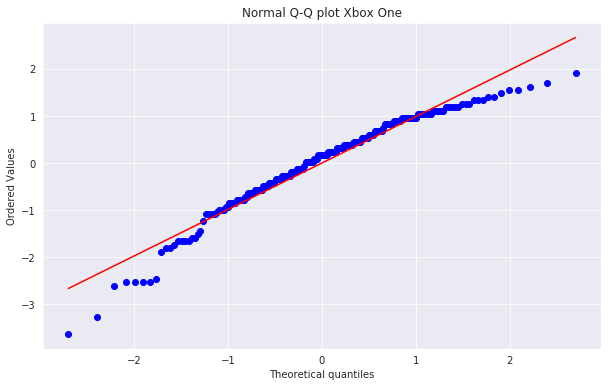

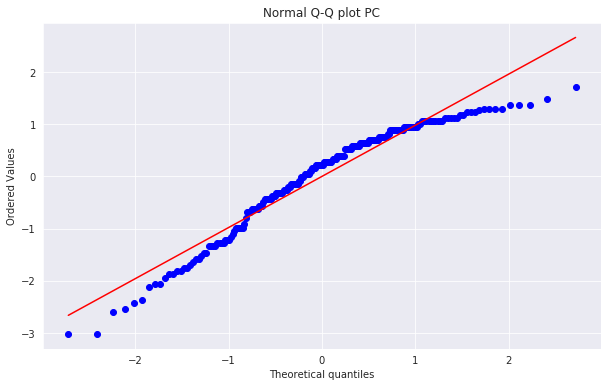

In [84]:
# creating new dataframes
xone = first_hypothesis[first_hypothesis.platform == 'XOne']['user_score']
pc = first_hypothesis[first_hypothesis.platform == 'PC']['user_score']

# standartization for Q-Q plot
xone_z = (xone-np.mean(xone))/np.std(xone)
pc_z = (pc-np.mean(pc))/np.std(pc)

# Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
fig_1, ax_1 = plt.subplots(figsize=(10, 6))

st.probplot(xone_z, dist='norm', plot=ax)
st.probplot(pc_z, dist='norm', plot=ax_1)

ax.set_title('Normal Q-Q plot Xbox One')
ax_1.set_title('Normal Q-Q plot PC')

plt.show()

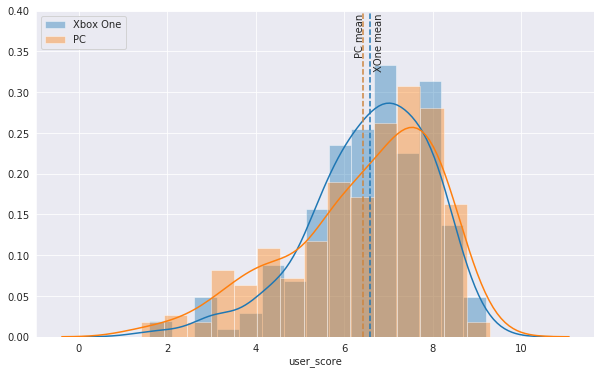

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.distplot(xone, 
             label='Xbox One',
             bins=15
            )
sns.distplot(pc, 
             label='PC',
             bins=15
            )

plt.ylim(0, 0.4)
plt.axvline(xone.mean(), 
            c='tab:blue', 
            linewidth=1.5, 
            linestyle='--'
           )
plt.axvline(pc.mean(), 
            c='peru', 
            linewidth=1.5, 
            linestyle='--'
           )
ax.text(xone.mean()+.1, 
        0.328, 
        'XOne mean', 
        rotation=90
        )
ax.text(pc.mean()-.2, 
        0.345, 
        'PC mean', 
        rotation=90
        )


plt.legend(loc=2)
plt.show()

In [86]:
print('Number of elements of Xbox One sample:', xone.shape[0])
print('Number of elements of PC sample:', pc.shape[0])

Number of elements of Xbox One sample: 201
Number of elements of PC sample: 210


- Distributions slightly deviate from normal, nuber of elements for both samples exceed 30. Hence paired t-test is an appropriate choice;

In [87]:
alpha = .05
results = st.ttest_ind(xone, pc, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject hull hypothesis')
else:
    print('Cannot reject null hypothesis')

p-value: 0.34451099391517614
Cannot reject null hypothesis


- We cannot reject null hypothesis, moreover, the probability to get such a difference in user scores is quite high;
- Lets take a look at boxplot and pointplot of the data;

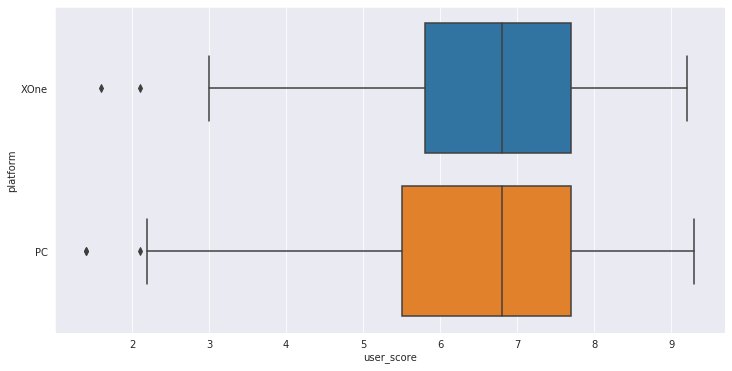

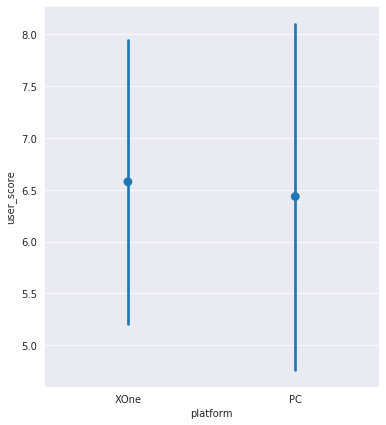

In [88]:
xone = first_hypothesis.loc[first_hypothesis.platform == 'XOne', ['user_score', 'platform']]
pc = first_hypothesis.loc[first_hypothesis.platform == 'PC', ['user_score', 'platform']]

xone_pc_concat = pd.concat([xone, pc])

fig, ax = plt.subplots(figsize=(12, 6))
fig_1, ax_1 = plt.subplots(figsize=(6, 7))

sns.boxplot(x='user_score', 
            y='platform', 
            data=xone_pc_concat,
            ax=ax
           )
sns.pointplot(x='platform', 
              y='user_score', 
              data=xone_pc_concat,
              ax=ax_1,
              join=False,
              ci='sd'
             )

plt.show()

- As it is shown above, both distibutions are quite similar within their confidence intervals and have almost equal means so there is no wonder that hypothesis about equality of user score means for those two platforms cannot be rejected!

- Проверим вторую гипотезу. Определелим нулевую и альтернативную гипотезы:
    - Null hypothesis H0: Mean user scores of action and sports genres are **equal**;
    - Alternative hypothesis H1: Mean user scores of action and sports genres are **not equal**;
- It needs to check the equality of two sample means, in other words, it needs to understand if those samples belong to the same population or not;
 - The good choice of a test is paired t-test, but first lets check how sample distributions are close to the normal one and see how many elements each sample has and if it is enough or not for t-tests;

In [89]:
# removing nans and tbd values from user score
second_hypothesis = games_actual.copy(deep=True)
second_hypothesis = second_hypothesis[['genre', 'user_score']]

print('Dataset length BEFORE', first_hypothesis.shape[0])

second_hypothesis['user_score'].replace(-1, np.nan, inplace=True)
second_hypothesis.dropna(subset=['user_score'], inplace=True)

print('Dataset length AFTER', second_hypothesis.shape[0])
print('')
print('Number of NaNs: ')
display(second_hypothesis.isna().sum())
print('Number of tbd values:', second_hypothesis[second_hypothesis['user_score'] < 0]['user_score'].count())

Dataset length BEFORE 1672
Dataset length AFTER 1672

Number of NaNs: 


genre         0
user_score    0
dtype: int64

Number of tbd values: 0


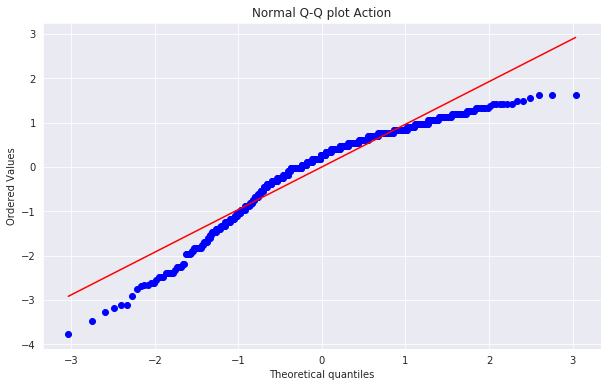

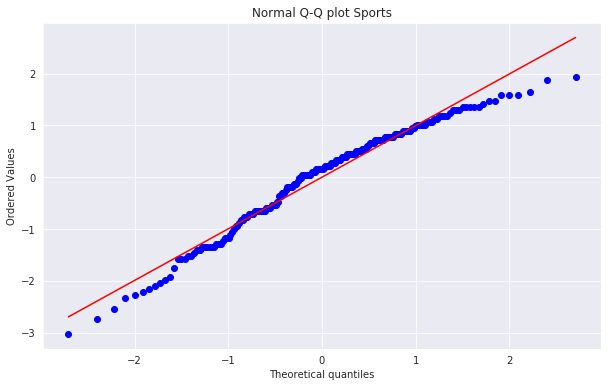

In [90]:
# creating new dataframes
action = second_hypothesis[second_hypothesis.genre == 'Action']['user_score']
sports = second_hypothesis[second_hypothesis.genre == 'Sports']['user_score']

# standartization for Q-Q plot
action_z = (action-np.mean(action))/np.std(action)
sports_z = (sports-np.mean(sports))/np.std(sports)

# Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
fig_1, ax_1 = plt.subplots(figsize=(10, 6))

st.probplot(action_z, dist='norm', plot=ax)
st.probplot(sports_z, dist='norm', plot=ax_1)

ax.set_title('Normal Q-Q plot Action')
ax_1.set_title('Normal Q-Q plot Sports')

plt.show()

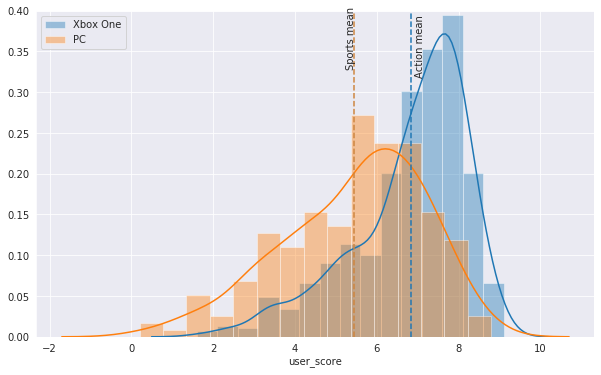

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.distplot(action, 
             label='Xbox One',
             bins=15
            )
sns.distplot(sports, 
             label='PC',
             bins=15
            )

plt.ylim(0, 0.4)
plt.axvline(action.mean(), 
            c='tab:blue', 
            linewidth=1.5, 
            linestyle='--'
           )
plt.axvline(sports.mean(), 
            c='peru', 
            linewidth=1.5, 
            linestyle='--'
           )
ax.text(action.mean()+.1, 
        0.32, 
        'Action mean', 
        rotation=90
        )
ax.text(sports.mean()-.2, 
        0.33, 
        'Sports mean', 
        rotation=90
        )


plt.legend(loc=2)
plt.show()

In [92]:
print('Number of elements of Xbox One sample:', action.shape[0])
print('Number of elements of PC sample:', sports.shape[0])

Number of elements of Xbox One sample: 578
Number of elements of PC sample: 205


- Distributions slightly deviate from normal, nuber of elements for both samples exceed 30. Hence paired t-test is an appropriate choice;

In [93]:
alpha = .05
results = st.ttest_ind(action, sports, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject hull hypothesis')
else:
    print('Cannot reject null hypothesis')

p-value: 6.239982095130203e-22
Reject hull hypothesis


- The test shows statistically significant difference! We reject hull hypothesis, and accept alternative one, which says: mean user scores of action and sports genres are not equal;
- Additionally lets check boxplot and pointplot;

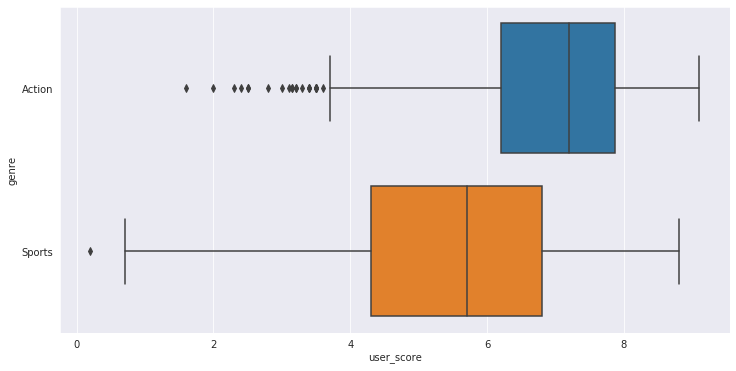

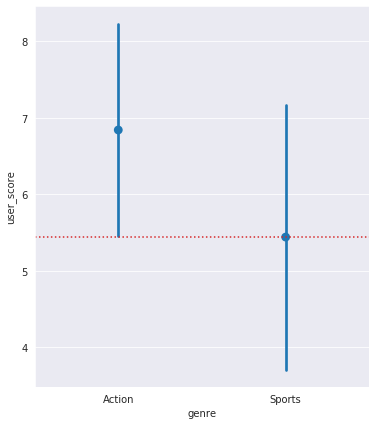

In [94]:
action = second_hypothesis.loc[second_hypothesis.genre == 'Action', ['user_score', 'genre']]
sports = second_hypothesis.loc[second_hypothesis.genre == 'Sports', ['user_score', 'genre']]

action_sports_concat = pd.concat([action, sports])

fig, ax = plt.subplots(figsize=(12, 6))
fig_1, ax_1 = plt.subplots(figsize=(6, 7))

sns.boxplot(x='user_score', 
            y='genre', 
            data=action_sports_concat,
            ax=ax
           )
sns.pointplot(x='genre', 
              y='user_score', 
              data=action_sports_concat,
              ax=ax_1,
              join=False,
              ci='sd'
             )
plt.axhline(sports.user_score.mean(), linestyle=':', color='tab:red')

plt.show()

- Pointplot shows that the mean user score of sport games is not included in the confidence interval of the mean user score of action games, which indirectly validates conclusions of hypothesis testing and low p-value;

### Conclusion

- Hypothesis "Mean user scores of Xbox One and PC platforms are the same" **is validated** by the data;
- Hypothesis "Mean user scores of action and sports genres are different" **is validated** by the data;

## Final conclusion

1. During exploratory data analysis it has been defined, that average life span of a game platform is around 10 years, herewith it reaches the sales peak in average in 5 years. Hence the relevent time period for the analysis was chosen as 5 years, which is 2012-2016;
2. The most profitable platforms in total sales in descending order: PS2, X360, PS3. The most profitable platforms in yearly sales in descending order: PS2, PS4, PS3;
3. For all the regions except Japan the most popular platforms are PS4, PS4, X360, XOne. In Japan the absolute leader is 3DS, PS3, PSV and PS4 are behind it;
4. For all the regions except Japan the most popular genres are action, shooter, sports and role-playing. Role-playing is a leader in Japan together with action;
5. More sellable games have rating M in all the regions except Japan. In Japan T is a clear leader;
6. Games of XOne and PC platforms in average are scored equally;
7. Games of action and sports genres in average are scored differently;
8. PS4 and XOne are the most perspective platforms and can show the highest grow in the following 2017 year. For Japan it needs to consider games of 3DS platform. All the three platforms show the best yearly sales among fresh platforms and are in the list of the most popular platforms for all the regions;
9. It probably worths to allocate a budget to PS3 and X360 games. Despite of the fact that sales are in the phase of decreasing for these platforms, it could be still profitable because of their huge popularity;
10. During the preparation of advertising campaign it needs to put a big attention to Japan region because people there have different preferences in video games compare to all the other world

**Final recommendations**:

- To focus on games of *PS4 and XOne* platforms of *action, shooter, sports and role-playing* genres and of *E and M* ESRB ratings - for all the regions except Japan, and to focus on games of *3DS* platform of *role-playing and action* genres and of T and E ESRB ratings - for Japan;
- Additionally it worths to consider the option with games of *PS3 and X360* platforms for the same genres and ratings for all the refions except Japan, and the option with games of Playstation platforms like *PS3, PSV and PS4* for the same genres and ratings for Japan;